# Research of advertisements for the sale of apartments

Initial data: archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to define the parameters for calculating the market value of real estate objects. 


In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
1      False         11.00      2.0             –ø–æ—Å—ë–ª–æ–∫ –®—É—à–∞—Ä—ã   
2      False          8.30      0.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
3      False           NaN      0.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
4      False         41.00      NaN            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
5      False          9.10      NaN  –≥–æ—Ä–æ–¥—Å–∫–æ–π –ø–æ—Å—ë–ª–æ–∫ –Ø–Ω–∏–Ω–æ-1   
6      False         14.40      1.0          –ø–æ—Å—ë–ª–æ–∫ –ü–∞—Ä–≥–æ–ª–æ–≤–æ   
7      False         18.90      2.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
8      False          8.81      NaN             –ø–æ—Å—ë–ª–æ–∫ –ú—É—Ä–∏–Ω–æ   
9      False          6.50      2.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

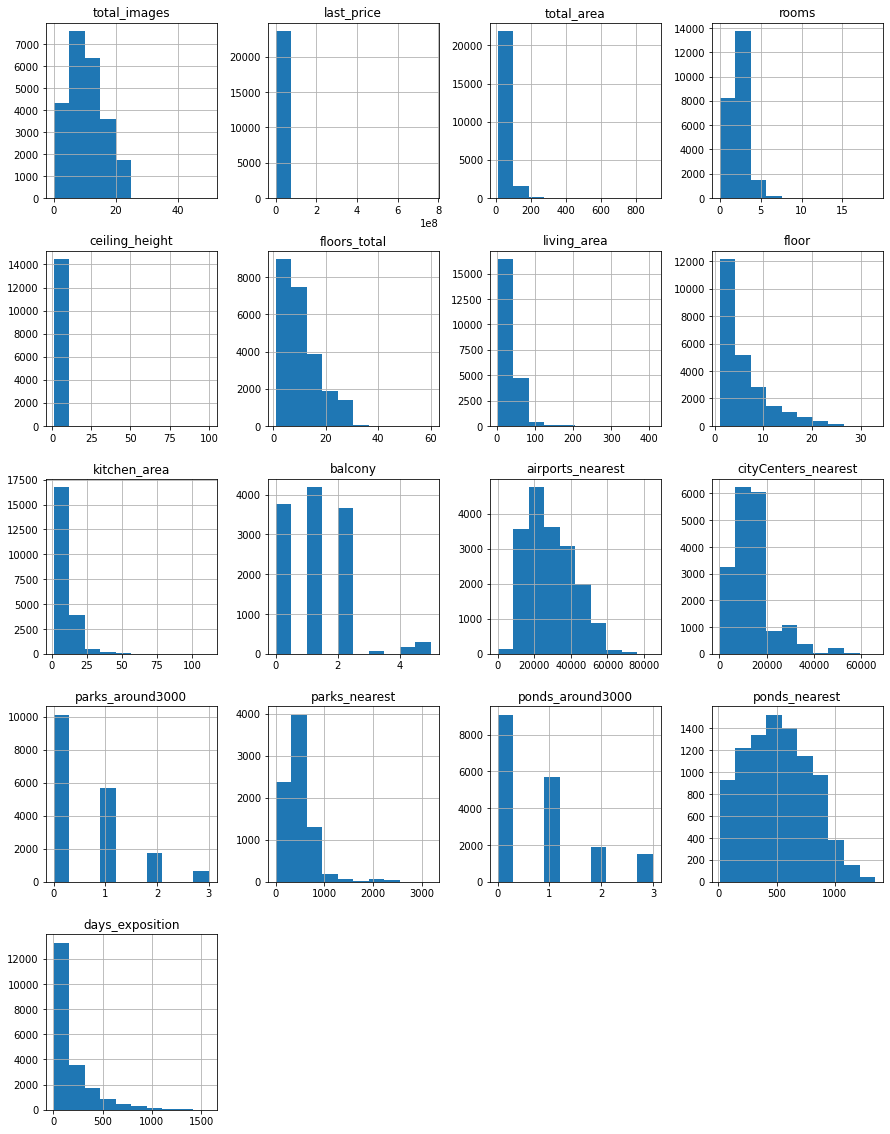

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None) 

display(data.head(10)) 

data.info() 


data.hist(figsize=(15, 20))



By examining general information about the source dataframe, you can find the following data problems:
- gaps in the data in 13 columns out of 20;
- incorrect data type in columns containing numeric values and date;
- duplicates in the locality_name column: the locality type "village" has a different spelling;
Analysis of the obtained histograms showed:
- abnormal values of total and living area (more than 200 sq.m.), kitchen area (more than 30 sq.m.)
- abnormal values in the day's exposition column that are greater than 500 days from the date of publication.

Gaps, duplicates, and anomalous values in the columns affect the correctness of the analysis and the accuracy of plotting. In this regard, before starting to conduct an exploratory data analysis, it is necessary to reprocess the initial data. 

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [3]:
#–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–æ –Ω–∞—á–∞–ª–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏:
data_old = data.shape[0]
## –Ω–∞–π–¥–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö
# –æ–ø—Ä–µ–¥–µ–ª–∏–º —Å—Ç–æ–ª–±—Ü—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏
#display(data.isna().sum())

#–ø–æ–ª—É—á–∏–º —Ç–∞–±–ª–∏—Ü—É, –∫–æ—Ç–æ—Ä–∞—è –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –¥–æ–ª—é –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ
#display(pd.DataFrame(round(data.isna().mean()*100, 1)).style)



In [4]:

warnings.filterwarnings("ignore")

#–∑–∞–º–µ–Ω–∏–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö,–∫–æ—Ç–æ—Ä—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ float, 
#—Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –±—É–¥—É—Ç —É—á–∞—Å—Ç–≤–æ–≤–∞—Ç—å –≤ –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏—è—Ö :
data[['last_price','living_area','total_area','ceiling_height','floors_total',
      'kitchen_area','airports_nearest','cityCenters_nearest',
      'parks_around3000','parks_nearest','ponds_around3000', 'ponds_nearest', 'days_exposition']] = data[['last_price','living_area','total_area',
     'ceiling_height','floors_total','kitchen_area','airports_nearest',
      'cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000', 'ponds_nearest', 'days_exposition']].astype('float')

#–∑–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ —Å –¥–∞—Ç–æ–π:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
   
#–∑–∞–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ is_apartment –Ω–∞ –ª–æ–≥–∏—á–µ—Å–∫–∏–π, –∫–∞–∫ –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ —Ç–æ–ª—å–∫–æ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è True/False:
data['is_apartment'] = data['is_apartment'].astype(bool) 
 

In [5]:
# –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏ –¥–æ–ª–∏ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö, –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏:

# –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ ceiling_height –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –∑–¥–∞–Ω–∏–π:
for floors_total in data['floors_total'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == floors_total), 'ceiling_height'] = \
    data.loc[data['floors_total'] == floors_total, 'ceiling_height'].median()


In [6]:
# –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ living_area –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ total_area, —É–º–Ω–æ–∂–µ–Ω–Ω—ã–º –Ω–∞ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç 
# –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–∞–≤–µ–Ω –æ—Ç–Ω–æ—à–µ–Ω–∏—é –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∫ –º–µ–¥–∏–∞–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏
k = round(data['living_area'].median() / data['total_area'].median(),1)
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * k

In [7]:
# –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ is_apartment –∑–Ω–∞—á–µ–Ω–∏–µ–º False, —Ç–∞–∫ –∫–∞–∫ —Ç–∞–∫–æ–π –≤–∏–¥ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –Ω–µ –∫–≤–∞—Ä—Ç–∏—Ä–∞
data.loc[data['is_apartment'].isna(), 'is_apartment'] = data.loc[data['is_apartment'].isna(), 'is_apartment'] == 'False'

In [8]:
#–∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ kitchen_area –∑–Ω–∞—á–µ–Ω–∏–µ–º, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–≤–Ω—è–µ—Ç—Å—è —Ä–∞–∑–Ω–æ—Å—Ç–∏ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
data.loc[data['kitchen_area'].isna(), 'total_area'] - data['living_area']

In [9]:
#–∑–∞–º–µ–Ω–∏–º  –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ balcony –Ω–∞ 0  –∏ –ø–æ–º–µ–Ω—è–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –Ω–∞ int:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce')
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [10]:
#–∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ locality_name –Ω–∞ Unknown:
data['locality_name'] = data['locality_name'].fillna(value='Unknown')

# –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –æ—Å—Ç–∞–≤–∏–º –±–µ–∑ –∏–∑–º–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ –æ—Ç—Å—Ç—É—Ç—Å—Ç–≤–∏–µ—Ç –ª–æ–≥–∏—á–µ—Å–∫–æ–π –∑–∞–º–µ–Ω—ã.

In [11]:
#–≤—ã–≤–µ–¥–∏–º –Ω–∞ —ç–∫—Ä–∞–Ω —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∑–∞–º–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–æ–≤:
display(data.head(10))
display(data.info())
display(data.isna().sum())


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0        51.00      8          True   False   
1            2.75          11.0        18.60      1          True   False   
2            2.55           5.0        34.30      4          True   False   
3            2.60          14.0        95.40      9          True   False   
4            3.03          14.0        32.00     13          True   False   
5            2.65          12.0        14.40      5          True   False   
6            2.66          26.0        10.60      6          True   False   
7            2.75          24.0        42.96     22          True   False   
8            2.70          27.0        15.43     26          True   False   
9            2.50           9.0        43.60      7          True   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00        0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
1      False         11.00        2             –ø–æ—Å—ë–ª–æ–∫ –®—É—à–∞—Ä—ã   
2      False          8.30        0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
3      False         63.60        0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
4      False         41.00        0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
5      False          9.10        0  –≥–æ—Ä–æ–¥—Å–∫–æ–π –ø–æ—Å—ë–ª–æ–∫ –Ø–Ω–∏–Ω–æ-1   
6      False         14.40        1          –ø–æ—Å—ë–ª–æ–∫ –ü–∞—Ä–≥–æ–ª–æ–≤–æ   
7      False         18.90        2            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   
8      False          8.81        0             –ø–æ—Å—ë–ª–æ–∫ –ú—É—Ä–∏–Ω–æ   
9      False          6.50        2            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23621 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-warning">
<b>‚ö†Ô∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–†–∞–∑–±–∏–≤–∞–π, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –∫–æ–¥ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —è—á–µ–µ–∫, —á—Ç–æ–±—ã —É —Ç–µ–±—è –ø–æ—Å–ª–µ —Å—Ç–µ–Ω—ã –∫–æ–¥–∞ –Ω–µ —à–ª–∞ —Å—Ç–µ–Ω–∞ –≤—ã–≤–æ–¥–æ–≤. –¢–∞–∫ –±—É–¥–µ—Ç –±–æ–ª–µ–µ –Ω–∞–≥–ª—è–¥–Ω–æ –∏ –ø—Ä–æ—â–µ –∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Ç–≤–æ–π –∫–æ–¥
</div>

<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–°–¥–µ–ª–∞–Ω–æ
</div>

<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–û—Ç–ª–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –∏ —Ç–∏–ø–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö! –ù–µ –∑–∞–±—ã–≤–∞–π, —á—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ —Å—Ç–æ–∏—Ç –¥–µ–ª–∞—Ç—å –∑–∞–º–µ–Ω—É, —Ä–∞–¥–∏ –∑–∞–º–µ–Ω—ã. –û—á–µ–Ω—å –≤–∞–∂–Ω–æ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ. –ò–Ω–æ–≥–¥–∞ –ø—Ä–æ–ø—É—Å–∫–∏ –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å (–µ—Å–ª–∏ –∏—Ö –º–∞–ª–æ), –ª–∏–±–æ –≤–æ–æ–±—â–µ –Ω–µ —Ç—Ä–æ–≥–∞—Ç—å, –µ—Å–ª–∏ —É –Ω–∞—Å –Ω–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –ø–æ–¥–æ–±—Ä–∞—Ç—å –∞—Ä–≥—É–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Å–ø–æ—Å–æ–± –∑–∞–º–µ–Ω—ã
</div>

In [12]:
#–ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑, –≤—ã—è–≤–∏—Ç—å –∏ —É–¥–∞–ª–∏—Ç—å –∞–Ω–∞–º–∞–ª–∏–∏:
# –≤—ã–≤–µ–¥–∏–º —Å–ø–∏—Å–æ–∫ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å—Ç–æ–ª–±—Ü–∞ ceiling_height:
sorted(data['ceiling_height'].unique())

#–≤ —Å—Ç–æ–ª–±—Ü–µ ceiling_height  —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ —Ä–µ–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –¥–∏–∞–ø–æ–∑–æ–Ω–µ –æ—Ç 2 –¥–æ 6 –º–µ—Ç—Ä–æ–≤.
# –≤ —Å—Ç–æ–ª–±—Ü–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –¥–≤—É–∑–Ω–∞—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—Å–æ—Ç—ã –ø–æ –ø—Ä–∏—á–∏–Ω–µ –ø—Ä–æ–ø—É—Å–∫–∞ –∑–∞–ø—è—Ç–æ–π –ø–æ—Å–ª–µ —Ü–µ–ª–æ–π —á–∞—Å—Ç–∏ —á–∏—Å–ª–∞, –ø–æ—ç—Ç–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ 10 —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞ 10
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] / 10

# –æ—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è  –≤—ã—Å–æ—Ç—ã –ø–æ—Ç–æ–ª–∫–æ–≤ –≤ –¥–∏–∞–ø–æ–∑–æ–Ω–µ –æ—Ç 2 –¥–æ 6 –º–µ—Ç—Ä–æ–≤:
data = data.query('6 >= ceiling_height >=2')

In [13]:
# –æ—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ kitchen_area –æ—Ç 5 –¥–æ 30 –∫–≤. –º
data = data.query('30 >=kitchen_area >= 5')

# –ø—Ä–æ–≤–µ—Ä–∏–º  –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ last_price –∏  —É–¥–∞–ª–∏–º –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
sorted(data['last_price'].unique())
data = data[(data['last_price'] > 12190) & (data['last_price'] <=  400000000)]

In [14]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ total_area –∏ —É–¥–∞–ª–∏–º –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
sorted(data['total_area'].unique())
data = data[data['total_area'] < 400]
# –æ–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–µ—è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ locality_name:
data['locality_name'] = data['locality_name'].str.lower()
duplicates = \
['–ø–æ—Å–µ–ª–æ–∫', '–ø–æ—Å—ë–ª–æ–∫ –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ —Ç–∏–ø–∞', '–ø–æ—Å–µ–ª–æ–∫ –≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ —Ç–∏–ø–∞' \
'–≥–æ—Ä–æ–¥—Å–∫–æ–π –ø–æ—Å–µ–ª–æ–∫', '–≥–æ—Ä–æ–¥—Å–∫–æ–π –ø–æ—Å—ë–ª–æ–∫']
name = '–ø–æ—Å—ë–ª–æ–∫'
data['locality_name'] = data['locality_name'].replace(duplicates, name, regex=True)

sorted(data['locality_name'].unique())
data.duplicated().sum() 

0

In [15]:
#—É–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ –≤ —Å—Ç—Ä–æ–∫–µ days_exposition, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ 730 (2 –≥–æ–¥–∞):
data = data.drop(index=data.query('days_exposition > 730').index)

#—É–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö floors_total –∏ ceiling_height:
data = data.drop(index=data.query('floors_total.isna() or ceiling_height.isna()').index)

# —É–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª—å—à–µ —á–µ–º 90% –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∏ –º–µ–Ω—å—à–µ 10 –∫–≤.–º:
data = data.drop(index=data.query('total_area * 0.9 >= living_area <= 10').index)




In [16]:
# —É–±–µ–¥–∏–º—Å—è, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —ç—Ç–æ –±—ã–ª–æ –≤–æ–∑–º–æ–∂–Ω–æ, –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã:
display(data.isna().sum())

# –≤—ã–≤–µ–¥–µ–º –Ω–∞ —ç–∫—Ä–∞–Ω –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
data_new = data.shape[0]
result = (1 - (data_new / data_old))
print(f'–î–æ–ª—è —É–¥–∞–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ—Å—Ç–∞–≤–∏–ª–∞: {result:.1%}')


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5256
cityCenters_nearest      5237
parks_around3000         5236
parks_nearest           14656
ponds_around3000         5236
ponds_nearest           13742
days_exposition          3008
dtype: int64

–î–æ–ª—è —É–¥–∞–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–æ—Å—Ç–∞–≤–∏–ª–∞: 7.2%


<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b>
<br>–î–∏–∞–ø–∞–∑–æ–Ω—ã –¥–ª—è –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ–¥–æ–±—Ä–∞–Ω—ã –∏ —É–¥–∞–ª–µ–Ω—ã –≤–µ—Ä–Ω–æ! –¢—ã —Ç–∞–∫–∂–µ –≤–µ—Ä–Ω–æ —É–±—Ä–∞–ª–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏—è –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤
</div>

<div class="alert alert-warning">
<b>‚ö†Ô∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–ó–¥–µ—Å—å —Ö–æ—Ä–æ—à–æ –±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–¥–∞–ª—ë–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
	
	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–°–¥–µ–ª–∞–Ω–æ
</div>

### –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∏ –¥–æ–±–∞–≤—å—Ç–µ –≤ —Ç–∞–±–ª–∏—Ü—É –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [17]:
#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å —Ü–µ–Ω–æ–π –æ–¥–Ω–æ–≥–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞:
data['price_one_meter'] = round(data['last_price'] / data['total_area'], 1)

#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º  –≤ —Ç–∞–±–ª–∏—Ü—É –¥–µ–Ω—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è (0 - –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 1 - –≤—Ç–æ—Ä–Ω–∏–∫ –∏ —Ç.–¥.):
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É –º–µ—Å—è—Ü –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [18]:
#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É —Ç–∏–ø —ç—Ç–∞–∂–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã (–∑–Ω–∞—á–µ–Ω–∏—è ‚Äî ¬´–ø–µ—Ä–≤—ã–π¬ª, ¬´–ø–æ—Å–ª–µ–¥–Ω–∏–π¬ª, ¬´–¥—Ä—É–≥–æ–π¬ª):
# –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ–ø—Ä–µ–ª–µ–Ω–∏—è —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return '–ø–µ—Ä–≤—ã–π' 
    if  floor == floors_total:
        return '–ø–æ—Å–ª–µ–¥–Ω–∏–π'
    return '–¥—Ä—É–≥–æ–π'
    
data['floor_type'] = data.apply(floor_category, axis=1)    

#–ø–æ—Å—á–∏—Ç–∞–µ–º –∏ –¥–æ–±–∞–≤–∏–º  –≤ —Ç–∞–±–ª–∏—Ü—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ –∫–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ (–ø–µ—Ä–µ–≤–µ–¥–µ–º –∏–∑ –º –≤ –∫–º –∏ –æ–∫—Ä—É–≥–ª–∏–º –¥–æ —Ü–µ–ª—ã—Ö):
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000)

data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
5            10   2890000.0        30.4           2018-09-10      1   
6             6   3700000.0        37.3           2017-11-02      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8          True   False   
1            2.75          11.0         18.6      1          True   False   
2            2.55           5.0         34.3      4          True   False   
5            2.65          12.0         14.4      5          True   False   
6            2.66          26.0         10.6      6          True   False   

   open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
0      False          25.0        0    —Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0   
1      False          11.0        2     –ø–æ—Å—ë–ª–æ–∫ —à—É—à–∞—Ä—ã           12817.0   
2      False           8.3        0    —Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0   
5      False           9.1        0    –ø–æ—Å—ë–ª–æ–∫ —è–Ω–∏–Ω–æ-1               NaN   
6      False          14.4        1  –ø–æ—Å—ë–ª–æ–∫ –ø–∞—Ä–≥–æ–ª–æ–≤–æ           52996.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
5                  NaN               NaN            NaN               NaN   
6              19143.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  price_one_meter  weekday_exposition  \
0          755.0              NaN         120370.4                   3   
1            NaN             81.0          82920.8                   1   
2          574.0            558.0          92785.7                   3   
5            NaN             55.0          95065.8                   0   
6            NaN            155.0          99195.7                   3   

   month_exposition  year_exposition floor_type  city_center_km  
0                 3             2019     –¥—Ä—É–≥–æ–π            16.0  
1                12             2018     –ø–µ—Ä–≤—ã–π            19.0  
2                 8             2015     –¥—Ä—É–≥–æ–π            14.0  
5                 9             2018     –¥—Ä—É–≥–æ–π             NaN  
6                11             2017     –¥—Ä—É–≥–æ–π            19.0

<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–í—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –¥–æ–±–∞–≤–ª–µ–Ω—ã. –ò–¥—ë–º –¥–∞–ª—å—à–µ)
</div>

### –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

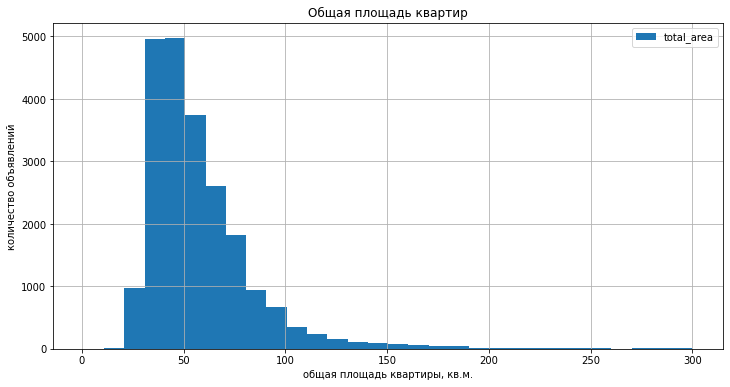

In [19]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏:
data.plot(kind='hist',y='total_area', bins=30, range=(1,300), figsize=(12,6),  title='–û–±—â–∞—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä', grid=True)
plt.xlabel('–æ–±—â–∞—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∫–≤.–º.')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–ü–æ–ª—É—á–µ–Ω–Ω–∞—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –æ–±—â—É—é –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞–∑–º–µ—â–µ–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–æ–¥–∞–∂—É. –ü–æ—Å–º–æ—Ç—Ä–µ–≤ –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É, –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –∏–º–µ–µ—Ç –ø–ª–æ—â–∞–¥—å –≤ –¥–∏–∞–ø–æ–∑–æ–Ω–µ 30-50 –∫–≤.–º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –æ–±—â–µ–π –ø–ª–æ—â–∞–¥—å—é –±–æ–ª–µ–µ 100 –∫–≤. –º –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. 



Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

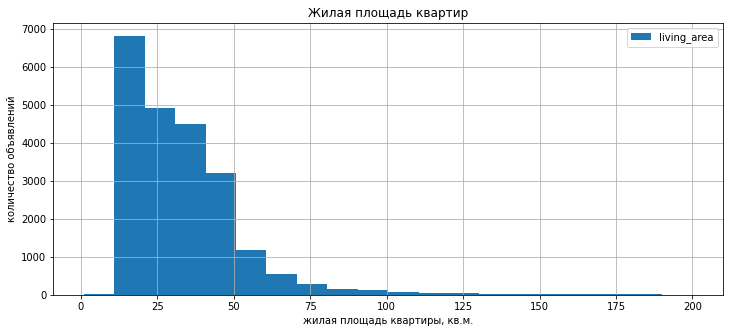

In [20]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏:
data.plot(kind='hist',y='living_area', bins=20, range=(1,200), figsize=(12,5), title='–ñ–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä', grid=True)
plt.xlabel('–∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∫–≤.–º.')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–ò–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å—é –æ—Ç 12,5 –¥–æ 23 –∫–≤.–º–µ—Ç—Ä–æ–≤. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å—é –±–æ–ª—å—à–µ 75 –∫–≤.–º. –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. 

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

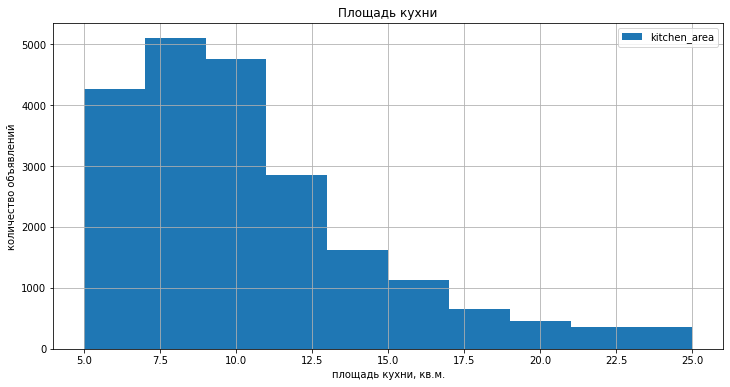

In [21]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏:
data.plot(kind='hist',y='kitchen_area', bins=10, range=(5,25), figsize=(12,6), title='–ü–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏', grid=True)
plt.xlabel('–ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏, –∫–≤.–º.')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–ò–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å –ø–ª–æ—â–∞–¥—å—é –∫—É—Ö–Ω–∏  –æ—Ç 7 –¥–æ 9,5 –∫–≤.–º–µ—Ç—Ä–æ–≤. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø–ª–æ—â–∞–¥—å—é –∫—É—Ö–Ω–∏ –±–æ–ª–µ–µ 15 –∫–≤. –º. –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

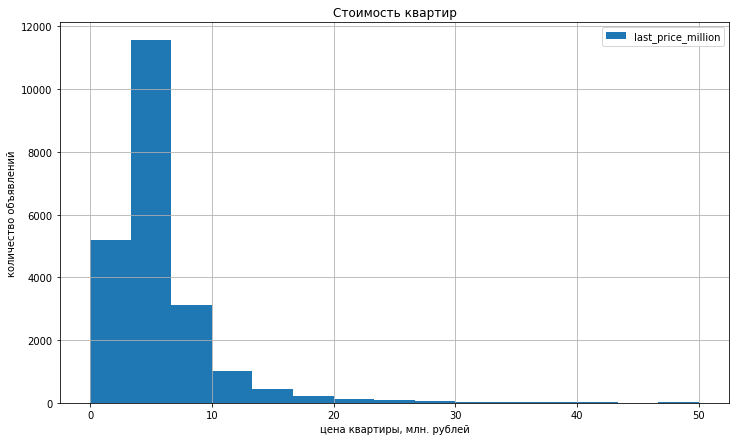

In [22]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ —Ü–µ–Ω–µ –æ–±—ä–µ–∫—Ç–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, –Ω–æ –ø–µ—Ä–µ–¥ —ç—Ç–∏–º –ø–µ—Ä–µ–≤–µ–¥–µ–º —Ä—É–±–ª–∏ –≤ –º–ª–Ω. —Ä—É–±–ª–∏:
data['last_price_million'] = (data['last_price']) / 1000000
data.plot(kind='hist',y='last_price_million', bins=15, range=(0,50),figsize=(12,7), title='–°—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä', grid=True)
plt.xlabel('—Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –º–ª–Ω. —Ä—É–±–ª–µ–π')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')



<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–†–∞–∑–¥–µ–ª–∏—Ç—å –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 1 –º–ª–Ω - —Ö–æ—Ä–æ—à–µ–µ —Ä–µ—à–µ–Ω–∏–µ
</div>

–ò–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –æ—Ç 3,5-4,5 –º–ª–Ω. —Ä—É–±–ª–µ–π. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –±–æ–ª–µ–µ 10 –º–ª–Ω.—Ä—É–±–ª–µ–π –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –ù–æ —Ç–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã: —ç—Ç–æ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä –±–æ–ª–µ–µ 40 –º–ª–Ω. —Ä—É–±–ª–µ–π. 

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

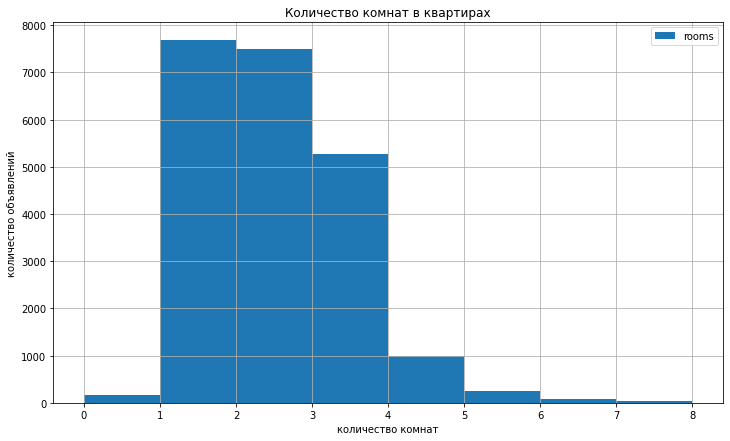

In [23]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç –≤ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä–∞—Ö:
data.plot(kind='hist',y='rooms', bins=8, range=(0,8),figsize=(12,7), title='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç –≤ –∫–≤–∞—Ä—Ç–∏—Ä–∞—Ö', grid=True)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä - —ç—Ç–æ 1-2 –∫–æ–º–Ω–∞—Ç–Ω—ã–µ. –ß–µ—Ç—ã—Ä–µ—Ö –∏ –±–æ–ª–µ–µ –∫–æ–º–Ω–∞—Ç–Ω—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

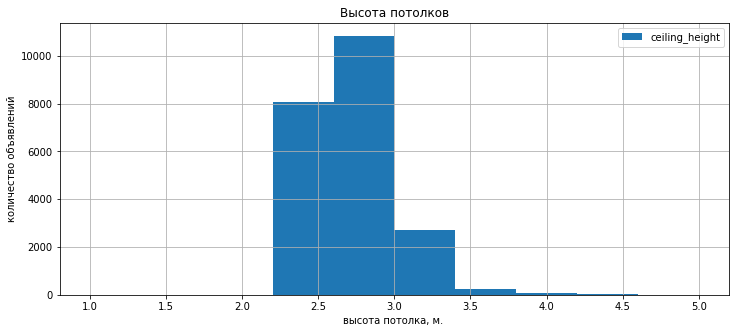

In [24]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –≤—ã—Å–æ—Ç–µ –ø–æ—Ç–æ–ª–∫–æ–≤:
data.plot(kind='hist',y='ceiling_height', bins=10, range=(1,5),figsize=(12,5), title='–í—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤', grid=True)
plt.xlabel('–≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–∞, –º. ')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –∏–º–µ—é—Ç –≤—ã—Å–æ—Ç—É –ø–æ—Ç–æ–ª–∫–æ–≤ –æ—Ç 2.7 –¥–æ 3 –º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –≤—ã—Å–æ—Ç–æ–π –ø–æ—Ç–æ–ª–∫–æ–≤ –≤—ã—à–µ 3,5 –º –≤—Å—Ç–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

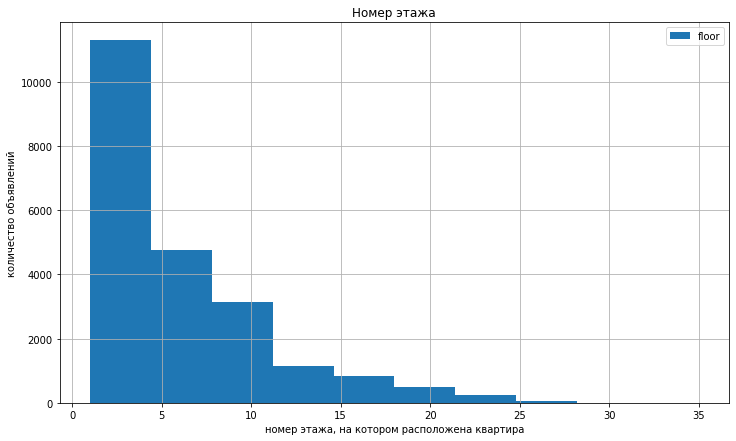

In [25]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –ø–æ –Ω–æ–º–µ—Ä—É —ç—Ç–∞–∂–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞:
data.plot(kind='hist',y='floor', bins=10, range=(1,35),figsize=(12,7), title='–ù–æ–º–µ—Ä —ç—Ç–∞–∂–∞', grid=True)
plt.xlabel('–Ω–æ–º–µ—Ä —ç—Ç–∞–∂–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ 1-4 —ç—Ç–∞–∂–∞—Ö. –ö–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ 10 —ç—Ç–∞–∂–µ –∏ –≤—ã—à–µ –≤—Å—Ç–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

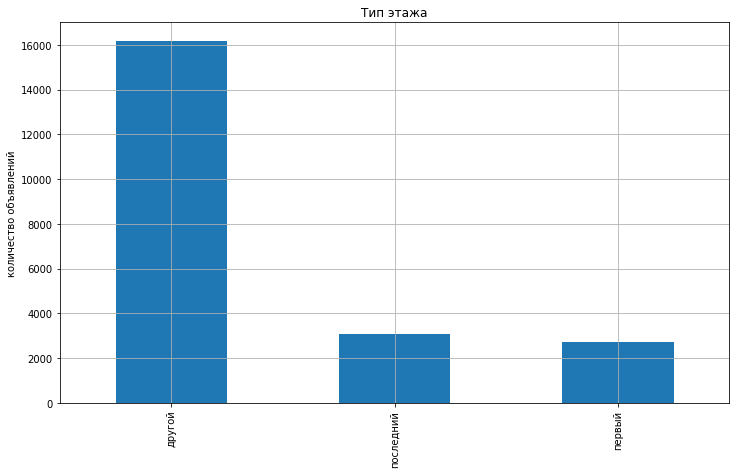

In [26]:
# –ø–æ—Å—Ç—Ä–æ–∏–º —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É –ø–æ —Ç–∏–ø—É —ç—Ç–∞–∂–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã (¬´–ø–µ—Ä–≤—ã–π¬ª, ¬´–ø–æ—Å–ª–µ–¥–Ω–∏–π¬ª, ¬´–¥—Ä—É–≥–æ–π¬ª):
data['floor_type'].value_counts().plot(kind = 'bar', ylabel = 'frequency', title='–¢–∏–ø —ç—Ç–∞–∂–∞', figsize=(12,7), grid=True)
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

–î–ª—è —Ç–∞–∫–æ–≥–æ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç, –ø–æ—ç—Ç–æ–º—É –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É. 
–ò–∑ –¥–∏–∞–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ —á–∞—â–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∏ –Ω–∞ –ø–µ—Ä–≤–æ–º, –Ω–∏ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–µ. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –æ–∫–æ–ª–æ 16 —Ç—ã—Å. –ü—Ä–∏ —ç—Ç–æ–º –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–µ, –ø—Ä–æ–¥–∞–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, —á–µ–º –Ω–∞ –ø–µ—Ä–≤–æ–º. –û–¥–Ω–∞–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –Ω–∞ —ç—Ç–∏—Ö –¥–≤—É—Ö —ç—Ç–∞–∂–∞—Ö –Ω–µ –ø—Ä–∏–≤—ã—à–∞–µ—Ç 3 —Ç—ã—Å. 

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

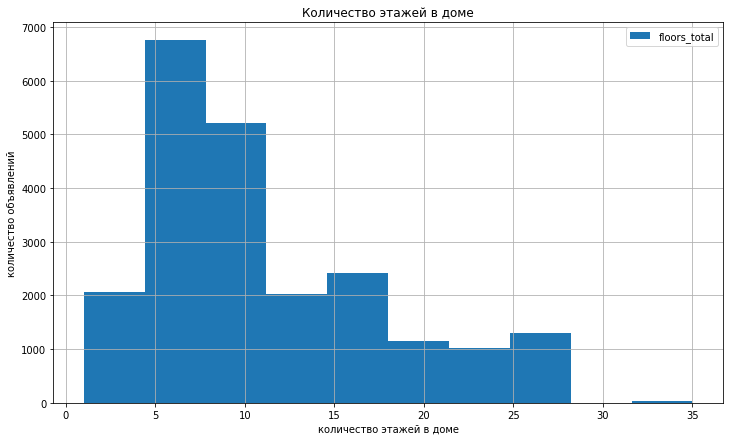

In [27]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø—Ä–æ–¥–∞—é—Ç—Å—è:
data.plot(kind='hist',y='floors_total', bins=10, range=(1,35),figsize=(12,7), title='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ', grid=True)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')


 –°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã 5-9 —ç—Ç–∞–∂–Ω—ã—Ö –¥–æ–º–∞—Ö. –ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ —Ç–∞–∫–∂–µ –≤–∏–¥–Ω—ã –≤—ã–±—Ä–æ—Å—ã - —Ä–µ–¥–∫–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∞—è —ç—Ç–∞–∂–Ω–æ—Å—Ç—å –¥–æ–º–æ–≤ - –æ—Ç 32 –¥–æ 35 —ç—Ç–∞–∂–µ–π.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

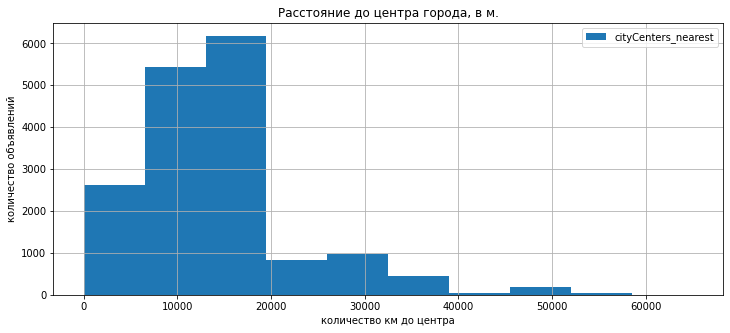

In [28]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –∫–≤–∞—Ä—Ç–∏—Ä—ã –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –≤ –º–µ—Ç—Ä–∞—Ö:
data.plot(kind='hist',y='cityCenters_nearest', bins=10, range=(0,65000),figsize=(12,5), title='–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞, –≤ –º.', grid=True)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 15 —Ç—ã—Å. –º –¥–æ 20 —Ç—ã—Å. –º (15-20 –∫–º) –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 20 000 –º (20 –∫–º) –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 60 000 –º –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞.



Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

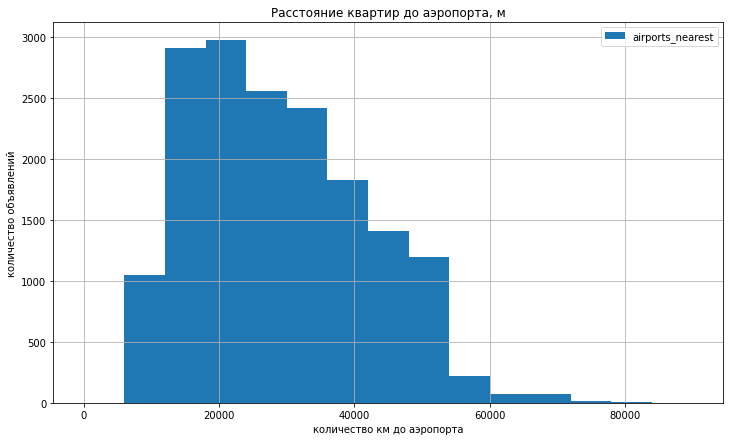

In [29]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞:
data.plot(kind='hist',y='airports_nearest', bins=15, range=(0,90000),figsize=(12,7), title='–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞, –º', grid=True)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–º –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 18 —Ç—ã—Å. –º –¥–æ 22 —Ç—ã—Å. –º (18-22 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 60 000 –º (60 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 80 000 –º  (80 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞.

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

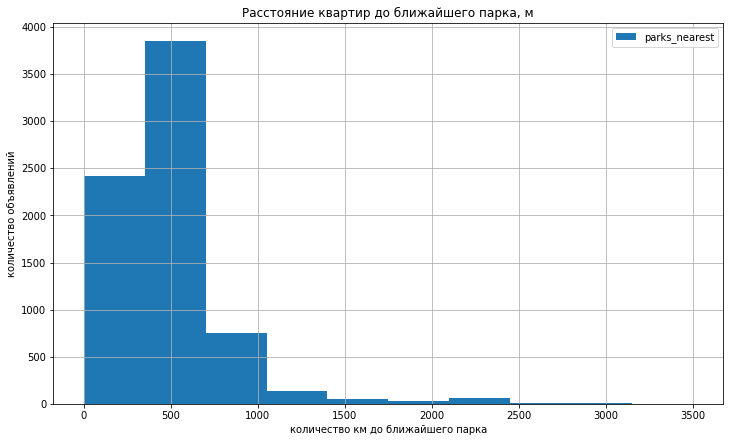

In [30]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç—Ä–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞:
data.plot(kind='hist',y='parks_nearest', bins=10, range=(0,3500),figsize=(12,7), title='–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞, –º', grid=True)
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–º –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 450 –º –¥–æ 600 –º –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 1000 –º 91 –∫–º) –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω–Ω—ã–µ  –æ—Ç –ø–∞—Ä–∫–æ–≤ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 1000 –º (1 –∫–º).

Text(0, 0.5, '–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

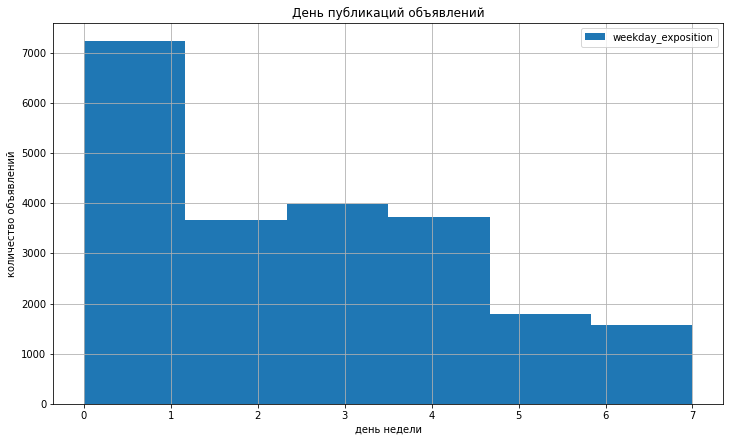

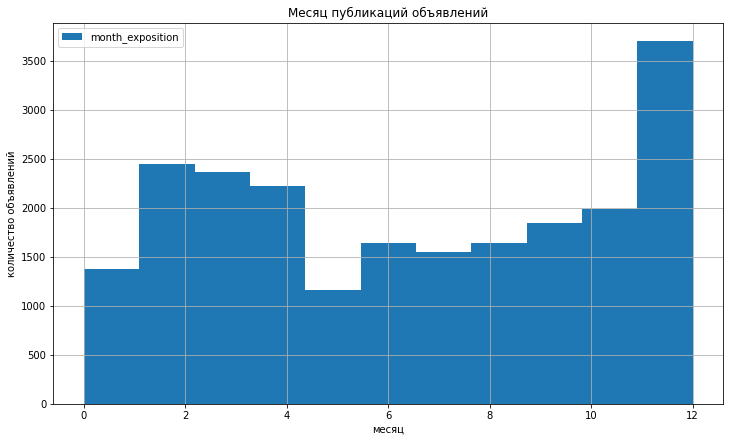

In [31]:
#–ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã  –ø–æ –¥–Ω—é –∏ –º–µ—Å—è—Ü—É –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–π:
data.plot(kind='hist',y='weekday_exposition', bins=6, range=(0,7),figsize=(12,7), title='–î–µ–Ω—å –ø—É–±–ª–∏–∫–∞—Ü–∏–π –æ–±—ä—è–≤–ª–µ–Ω–∏–π', grid=True)
plt.xlabel('–¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

data.plot(kind='hist',y='month_exposition', bins=11, range=(0,12),figsize=(12,7), title='–ú–µ—Å—è—Ü –ø—É–±–ª–∏–∫–∞—Ü–∏–π –æ–±—ä—è–≤–ª–µ–Ω–∏–π', grid=True)
plt.xlabel('–º–µ—Å—è—Ü')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')

–°–æ–≥–ª–∞—Å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∫–≤–∞—Ä—Ç–∏—Ä –ø—É–±–ª–∏–∫–∞–≤–∞–ª–∏—Å—å –ø–æ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º –∏ –≤—Ç–æ—Ä–Ω–∏–∫–∞–º, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –±—ã–ª–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π.
–í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—è—Ü–∞, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π —Ä–∞–∑–º–µ—â–∞–ª–∏—Å—å –≤ –Ω–æ—è–±—Ä–µ-–¥–µ–∫–∞–±—Ä–µ, –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–æ –≤ –∞–ø—Ä–µ–ª–µ-–º–∞–µ. 

<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–¢—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø–æ–¥–±–∏—Ä–∞–µ—à—å –æ—Å–Ω–æ–≤–Ω—ã–µ –¥–∏–∞–ø–∞–∑–æ–Ω—ã, –∞ —Ç–∞–∫–∂–µ –≤–µ—Ä–Ω–æ —á–∏—Ç–∞–µ—à—å –≥—Ä–∞—Ñ–∏–∫–∏! –û—Ç–¥–µ–ª—å–Ω—ã–π –ø–ª—é—Å –∑–∞ —Ç–æ, —á—Ç–æ —Ç—ã –ø–æ–¥–ø–∏—Å—ã–≤–∞–µ—à—å –≥—Ä–∞—Ñ–∏–∫–∏ 
</div>

<div class="alert alert-warning">
<b>‚ö†Ô∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–ü–æ —Å—Å—ã–ª–∫–µ –Ω–∏–∂–µ –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –ø–æ–¥—Ä–æ–±–Ω–µ–µ –∫–∞–∫ –ø–æ–¥–ø–∏—Å–∞—Ç—å –æ—Å–∏ —É –≥—Ä–∞—Ñ–∏–∫–∞
    
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–°–¥–µ–ª–∞–Ω–æ
</div>

<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v2:</b> 
<br>–ö—Ä–∞—Å–æ—Ç–∞!
</div>

<AxesSubplot:title={'center':'–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã'}, ylabel='Frequency'>

count    18978.000000
mean       150.341237
std        155.595071
min          1.000000
25%         43.000000
50%         90.000000
75%        206.000000
max        729.000000
Name: days_exposition, dtype: float64

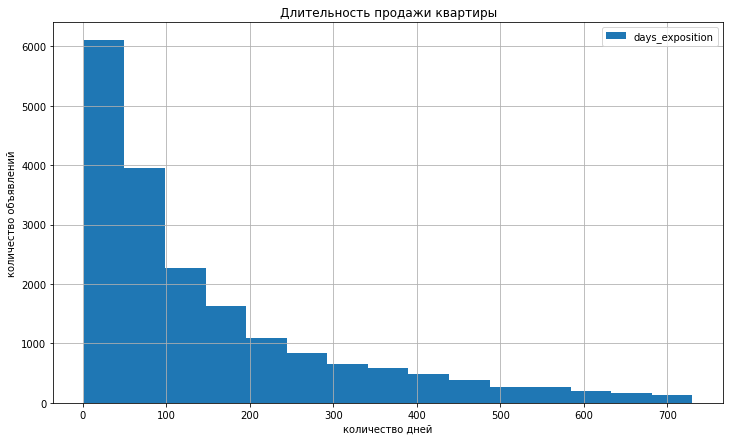

In [32]:
#–ò–∑—É—á–∏–º, –∫–∞–∫ –±—ã—Å—Ç—Ä–æ –ø—Ä–æ–¥–∞–≤–∞–ª–∏—Å—å –∫–≤–∞—Ä—Ç–∏—Ä—ã (—Å—Ç–æ–ª–±–µ—Ü days_exposition). –≠—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π ¬´–≤–∏—Å–µ–ª–æ¬ª –∫–∞–∂–¥–æ–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ.
# –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É:
display(data.plot(kind='hist',y='days_exposition', bins=15, range=(1,730),figsize=(12,7), title='–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã', grid=True))
plt.xlabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π')
plt.ylabel('–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π')
# –ø–æ–ª—É—á–∏–º —Å—Ä–µ–¥–Ω–µ–µ –∏ –º–µ–¥–∏–∞–Ω—É, –≤—ã–∑–æ–≤—è –º–µ—Ç–æ–¥ decribe:
display(data['days_exposition'].describe())



    

<AxesSubplot:>

(-100.0, 600.0)

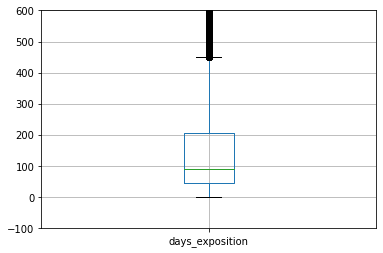

In [33]:
# –∫—Ä–æ–º–µ –º–µ–¥–∏–∞–Ω—ã –∏ —Å—Ä–µ–¥–Ω–µ–≥–æ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–∞–º—ã—Ö –±—ã—Å—Ç—Ä—ã—Ö –∏ –º–µ–¥–ª–µ–Ω–Ω—ã—Ö –ø—Ä–æ–¥–∞–∂ –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–π —Ä–∞–∑–±—Ä–æ—Å
# —Ç.–µ. –∫–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–∫–∞–∑–∞–ª–∏—Å—å –≤–¥–∞–ª–∏ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ –∏—Ö –º–Ω–æ–≥–æ, –¥–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–∏–º –¥–∏–∞–≥—Ä–∞–º–º—É —Ä–∞–∑–º–∞—Ö–∞:

display(data.boxplot('days_exposition'))
plt.ylim(-100,600)

–î–∞–Ω–Ω—ã–µ –≤ —Å—Ç–æ–ª–±—Ü–µ days_exposition –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω—ã, —Ç–∞–∫ –∫–∞–∫ –≤—ã–±–æ—Ä–∫–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç—Å—è –±–æ–ª—å—à–∏–º —Å—Ä–µ–¥–Ω–∏–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º (–∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ø–∏—Å–∫–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ 155.6. –í  –¥–∞–Ω–Ω–æ–π —Å–≤—è–∑–∏ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ã—á–Ω–æ–≥–æ —Å—Ä–æ–∫–∞ –ø—Ä–æ–¥–∞–∂–∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.
–ü–æ—ç—Ç–æ–º—É –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ã—á–Ω–æ–≥–æ —Å—Ä–æ–∫–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –º–µ–¥–∏–∞–Ω–æ–π.
–ú–µ–¥–∏–∞–Ω–Ω–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 90 –¥–Ω–µ–π (3 –º–µ—Å—è—Ü–∞).
–ë—ã—Å—Ç—Ä—ã–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ —Å—á–∏—Ç–∞—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è, –º–µ–Ω—å—à–∏–µ 1 –∫–≤–∞—Ä—Ç–∏–ª—è (25%): –ø—Ä–æ–¥–∞–∂–∏ –º–µ–Ω—å—à–µ 43 –¥–Ω–µ–π —Å—á–∏—Ç–∞—é—Ç—Å—è –±—ã—Å—Ç—Ä—ã–º–∏.
–ù–µ–æ–±—ã—á–Ω–æ –¥–æ–ª–≥–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ —Å—á–∏—Ç–∞—é—Ç—Å—è —Ç–∞–∫–∏–µ, —Å—Ä–æ–∫ –ø—Ä–æ–¥–∞–∂–∏ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–≤—ã—à–∞–µ—Ç 4 –∫–≤–∞—Ä—Ç–∏–ª—å - 206 –¥–Ω–µ–π.




<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–°–æ–≥–ª–∞—Å–µ–Ω! –ï—Å–ª–∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —Ç–æ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 0 –¥–æ 100 –¥–Ω–µ–π. –¢–∞–º –µ—Å—Ç—å –ø–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–º –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –æ—á–µ–Ω—å –ª–æ–≥–∏—á–Ω–æ–µ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ</div>
</div>

<AxesSubplot:title={'center':'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞'}, xlabel='floor_type'>

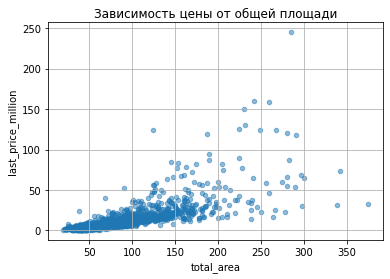

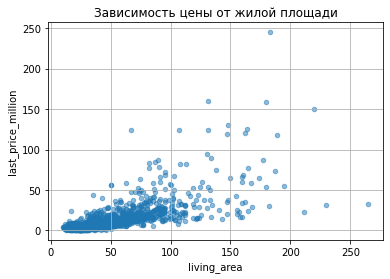

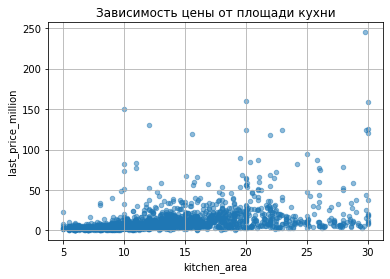

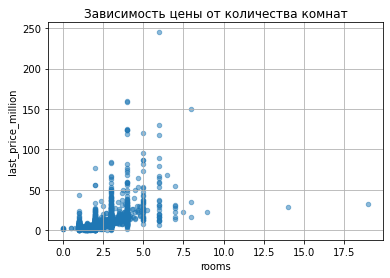

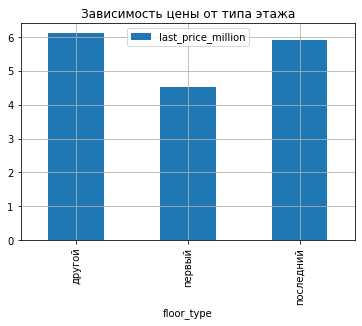

In [34]:
#–ù–∞–π–¥–µ–º —Ñ–∞–∫—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—Ç –Ω–∞ –æ–±—â—É—é (–ø–æ–ª–Ω—É—é) —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä.
# –ù–∞ –æ—Å–Ω–æ–≤–µ —Å–≤–æ–¥–Ω—ã—Ö —Ç–∞–±–ª–∏—Ü –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏,–æ—Ç—Ä–∞–∂–∞—é—â–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏:
(data
    .pivot_table(index='last_price_million', values=['total_area']).reset_index()
    .plot(x='total_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏')
)
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏:
(data
    .pivot_table(index='last_price_million', values=['living_area']).reset_index()
    .plot(x='living_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏')
)
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏:
(data
    .pivot_table(index='last_price_million', values=['kitchen_area']).reset_index()
    .plot(x='kitchen_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏')
)
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç:
(data
    .pivot_table(index='last_price_million', values=['rooms']).reset_index()
    .plot(x='rooms', y='last_price_million', kind='scatter',alpha=0.5, grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç')
)
# –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞ –Ω–µ–ª–∏–Ω–µ–π–Ω–∞—è, –ø–æ—ç—Ç–æ–º—É –Ω–∞–π–¥–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —ç—Ç–∞–∂–∞ –∏ –ø–æ—Å—Ç—Ä–æ–∏–º barplot:
(data.pivot_table(index='floor_type', values=['last_price_million']).reset_index()
    .plot(x='floor_type', y='last_price_million', kind='bar', grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞')
)


last_price_million  total_area  living_area  kitchen_area  \
last_price_million                1.00        0.71         0.64          0.37   
total_area                        0.71        1.00         0.94          0.44   
living_area                       0.64        0.94         1.00          0.31   
kitchen_area                      0.37        0.44         0.31          1.00   
rooms                             0.43        0.80         0.86          0.18   

                    rooms  
last_price_million   0.43  
total_area           0.80  
living_area          0.86  
kitchen_area         0.18  
rooms                1.00

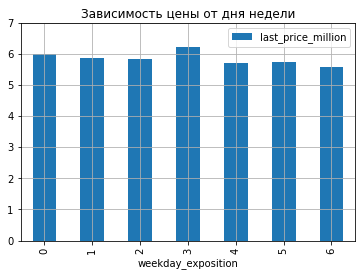

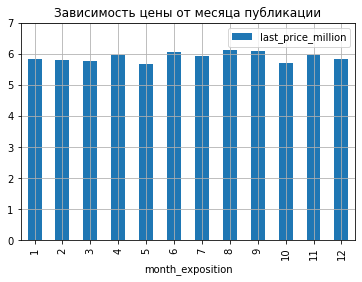

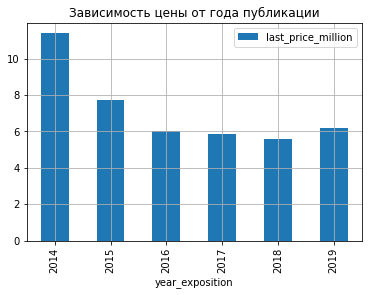

In [35]:
# –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –¥–∞—Ç—ã –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ —Ç–∞–∫–∂–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–∞—è, –ø–æ—ç—Ç–æ–º—É –Ω–∞–π–¥–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –ø—Ä–æ–¥–∞–∂–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –¥–∞—Ç—ã –∏  –ø–æ—Å—Ç—Ä–æ–∏–º barplot:
#–æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏:

(data.pivot_table(index='weekday_exposition', values=['last_price_million']).reset_index()
    .plot(x='weekday_exposition', y='last_price_million', kind='bar', ylim=(0,7), grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏')
)

#–æ—Ç –º–µ—Å—è—Ü–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏:

(data.pivot_table(index='month_exposition', values=['last_price_million']).reset_index()
    .plot(x='month_exposition', y='last_price_million', kind='bar',  ylim=(0,7), grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –º–µ—Å—è—Ü–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏')
)

#–æ—Ç –≥–æ–¥–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏:

(data.pivot_table(index='year_exposition', values=['last_price_million']).reset_index()
    .plot(x='year_exposition', y='last_price_million', kind='bar', grid=True, title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –≥–æ–¥–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏')
)

# –ø–æ—Å—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä —Å—Ç–æ–ª–±—Ü–æ–≤, –≥–¥–µ –µ—Å—Ç—å –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å:
data_table_corr = data[['last_price_million','total_area','living_area','kitchen_area', 'rooms']]
display(data_table_corr.corr().round(2))


–î–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –∫–∞–∫ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –µ–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –¥–∏–∞–≥—Ä–∞–º–º, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –Ω–∞–ª–∏—á–∏–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –æ–±—â–µ–π –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏. –î–ª—è —á–∏—Å–ª–æ–≤–æ–π –æ—Ü–µ–Ω–∫–∏ —Ç–µ—Å–Ω–æ—Ç—ã —ç—Ç–æ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞. –ê–Ω–∞–ª–∏–∑ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –º–µ–Ω–µ–µ —Ç–µ—Å–Ω–∞—è.

–î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞ –∏ –¥–∞—Ç—ã –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ (–¥–µ–Ω—å, –º–µ—Å—è—Ü, –≥–æ–¥) –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã —Å—Ç–æ–ª–±—á–∞—Ç—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ–∫–∞–∑–∞–ª–∏, —á—Ç–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä —Ç–∞–∫–∂–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —ç—Ç–∞–∂–∞: —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–∂–µ –º–µ–Ω—å—à–µ, —á–µ–º –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º. –ü—Ä–∏ —ç—Ç–æ–º —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –Ω–∞ –¥—Ä—É–≥–∏—Ö —ç—Ç–∞–∂–∞—Ö –≤—ã—à–µ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤–æ–º –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–∞—Ö. –û–±—ä—è–≤–ª–µ–Ω–∏—è –ø—É–±–ª–∏–∫—É–µ–º—ã–µ –ø–æ —á–µ—Ç–≤–µ—Ä–≥–∞–º –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏.

–í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—è—Ü–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ. –û–¥–Ω–∞–∫–æ –≤ –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö, —Ä–∞–∑–º–µ—â–µ–Ω–Ω—ã—Ö –≤ –∏—é–Ω–µ, –∞–≤–≥—É—Å—Ç–µ –∏ —Å–µ–Ω—Ç—è–±—Ä–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—à–µ, —á–µ–º –≤ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Å—è—Ü—ã.

–í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≥–æ–¥–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏–π, —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –ø–æ—Å–ª–µ –º–∞–∫—Å–∏–º—É–º–∞ –≤ 2014 –≥–æ–¥–∞ –≤ —Ç–µ—á–µ–Ω–∏–µ —á–µ—Ç—ã—Ä–µ—Ö –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –ª–µ—Ç —Å–Ω–∏–∂–∞–ª–∞—Å—å, –¥–æ—Å—Ç–∏–≥–Ω—É–≤ –≤ 2018 –≥–æ–¥—É —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è 5,5 –º–ª–Ω —Ä—É–±–ª–µ–π. –í 2019 –≥–æ–¥—É —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –≤–Ω–æ–≤—å –Ω–∞—á–∞–ª–∞ —Ä–∞—Å—Ç–∏ –∏ —Ä–∞–≤–Ω—è–ª–∞—Å—å —á—É—Ç—å –±–æ–ª—å—à–µ 6 –º–ª–Ω. —Ä—É–±–ª–µ–π.


<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b>
<br>–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∏–∑—É—á–µ–Ω–∞ –≤–µ—Ä–Ω–æ! –ï—â—ë —Ç—É—Ç –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ pairplot –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

locality_name  count       mean
315    —Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥  14437  112082.65
226     –ø–æ—Å—ë–ª–æ–∫ –º—É—Ä–∏–Ω–æ    517   85436.97
304     –ø–æ—Å—ë–ª–æ–∫ —à—É—à–∞—Ä—ã    418   78728.43
4           –≤—Å–µ–≤–æ–ª–æ–∂—Å–∫    378   68868.42
309             –ø—É—à–∫–∏–Ω    335  102687.95
121            –∫–æ–ª–ø–∏–Ω–æ    329   75207.92
236  –ø–æ—Å—ë–ª–æ–∫ –ø–∞—Ä–≥–æ–ª–æ–≤–æ    312   90598.30
7              –≥–∞—Ç—á–∏–Ω–∞    287   68887.82
46     –¥–µ—Ä–µ–≤–Ω—è –∫—É–¥—Ä–æ–≤–æ    274   92756.26
5               –≤—ã–±–æ—Ä–≥    222   57996.85

Text(0, 0.5, '—Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞')

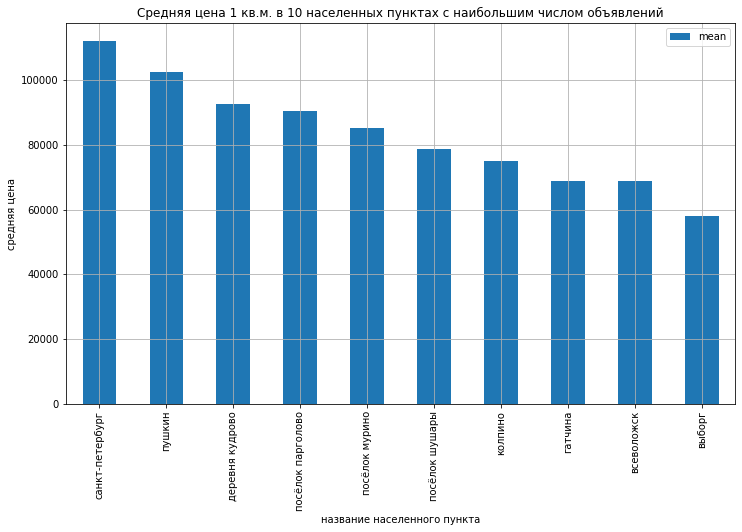

In [36]:
# –ü–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –æ–¥–Ω–æ–≥–æ –∫–≤–∞—Ä–¥–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞ –≤ 10 –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä–≤–ª–µ–Ω–∏–π:
#—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É, —Å–æ–¥–µ—Ä–∂–∞—â—É—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –∏ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É, –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞:
rating = data.pivot_table(index= 'locality_name', values= 'price_one_meter', aggfunc=['count', 'mean']).reset_index()

# —É–±–µ—Ä–µ–º –º–∏–ª—å—Ç–∏–∏–Ω–¥–µ–∫—Å –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ —Å—Ç–æ–ª–±—Ü–æ–≤:
rating.columns = ['locality_name', 'count','mean']
# –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º 10 –ø–µ—Ä–≤—ã—Ö –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤ –≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ –ø–æ —É–±—ã–≤–∞–Ω–∏—é:
rating = rating.sort_values('count', ascending=False).head(10).round(2)
display(rating)
#–æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫ –ø–æ —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω–µ –∏ –≤—ã–≤–µ–¥–µ–º –¥–∏–∞–≥—Ä–∞–º–º—É:
rating_mean = rating.sort_values('mean', ascending=False)
rating_mean.plot(x='locality_name', y='mean', kind='bar', grid=True, figsize=(12,7), title='–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ 1 –∫–≤.–º. –≤ 10 –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π')
plt.xlabel('–Ω–∞–∑–≤–∞–Ω–∏–µ –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞')
plt.ylabel('—Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞')

–ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≤—ã—à–µ –¥–∞–Ω–Ω—ã—Ö –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ –≤ —Å–ø–∏—Å–∫–µ 10 –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤ –ø–æ —á–∏—Å–ª—É –æ–±—ä—è–≤–ª–µ–Ω–∏–π —è–≤–ª—è–µ—Ç—Å—è –≥. –°–∞–Ω–∫—Ç_–ü–µ—Ç–µ—Ä–±—É—Ä–≥.
–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ 1 –∫–≤.–º –≤ 10 –Ω–∞—Å–µ–ª–µ–Ω–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å –Ω–∞–∏–±–æ—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –¥–∏–∞–ø–æ–∑–æ–Ω–µ –æ—Ç 58 —Ç—ã—Å. —Ä—É–±–ª–µ–π –¥–æ 112,1 —Ç—ã—Å. —Ä—É–±–ª–µ–π. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é 1 –∫–≤.–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ.
–ö–≤–∞—Ä—Ç–∏—Ä—ã —Å —Å–∞–º–æ–π –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é 1 –∫–≤.–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –≥. –í—ã–±–æ—Ä–≥


<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>üëèüèªüëèüèªüëèüèª –û—Ç–ª–∏—á–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è!
</div>

Text(0, 0.5, '—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞')

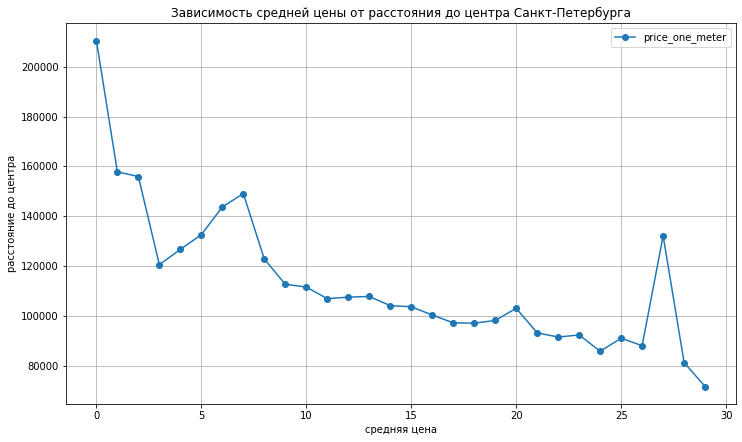

In [37]:
#–≤—ã–¥–µ–ª–∏–º –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ç–æ–ª—å–∫–æ –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ, –∑–∞—Ç–µ–º —Å–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –∫–º, –Ω–∞–π–¥–µ–º —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –∑–∞ –∫–º:
#–ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω—ã –æ—Ç –∫–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞:
(data
      .query('locality_name == "—Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥"')
      .pivot_table(index='city_center_km', values='price_one_meter').reset_index().round(2)
      .plot(x='city_center_km', y='price_one_meter', style='o-', grid='True', figsize=(12,7),title='–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω—ã –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞')
)
plt.xlabel('—Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞')
plt.ylabel('—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞')


–°–æ–≥–ª–∞—Å–Ω–æ –≥—Ä–∞—Ñ–∏–∫—É, —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ 1 –∫–≤. –º  –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞. –ß–µ–º –±–ª–∏–∂–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∫ —Ü–µ–Ω—Ç—Ä—É –≥–æ—Ä–æ–¥–∞, —Ç–µ–º –≤—ã—à–µ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ –∫–≤.–º. –°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É —Ü–µ–Ω—Ç—Ä –≥–æ—Ä–æ–¥–∞ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ 6 –∫–º. –í –¥–∞–Ω–Ω–æ–º –¥–∏–∞–ø–æ–∑–æ–Ω–µ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ—Ç 145 —Ç—ã—Å  –¥–æ 200 —Ç—ã—Å. —Ä—É–±–ª–µ–π –∏ –≤—ã—à–µ. 



<div class="alert alert-warning">
<b>‚ö†Ô∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–ù–∞ –∫–∞–∫–æ–º –∫–∏–ª–æ–º–µ—Ç—Ä–µ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è —Ü–µ–Ω—Ç—Ä –≥–æ—Ä–æ–¥–∞ –Ω–∞ —Ç–≤–æ–π –≤–∑–≥–ª—è–¥, —Å—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É?
</div>

<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–°–¥–µ–ª–∞–Ω–æ
</div>

<div class="alert alert-success">
<b>‚úîÔ∏è –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v2:</b> 
<br>–ê–±—Å–æ–ª—é—Ç–Ω–æ –≤–µ—Ä–Ω–æ!
</div>

### –û–±—â–∏–π –≤—ã–≤–æ–¥

–í —Ü–µ–ª—è—Ö –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∞—Ä—Ö–∏–≤–∞ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –∑–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç –æ –ø—Ä–æ–¥–∞–∂–µ –∫–≤–∞—Ä—Ç–∏—Ä –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –∏ —Å–æ—Å–µ–¥–Ω–∏—Ö –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å–µ—Ä–≤–∏—Å–∞ –Ø–Ω–¥–µ–∫—Å –ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –∏–∑—É—á–µ–Ω—ã –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω —Ä—è–¥ –ø—Ä–æ–±–ª–µ–º:
- –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –≤ 13 —Å—Ç–æ–ª–±—Ü–∞—Ö –∏–∑ 20;
- –Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –¥–∞—Ç—ã;
- –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ —Å—Ç–æ–ª–±—Ü–µ locality_name: —Ç–∏–ø –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞ "–ø–æ—Å–µ–ª–æ–∫" –∏–º–µ–µ—Ç —Ä–∞–∑–ª–∏—á–Ω–æ–µ –Ω–∞–ø–∏—Å–∞–Ω–∏–µ.
–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –∞–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º, –ø–æ—Å—Ç–æ–µ–Ω–Ω—ã—Ö –ø–æ –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞–Ω–Ω—ã–º –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Å–ª–µ–¥—É—é—â–µ–µ:
- –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–±—â–µ–π  –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ (–±–æ–ª–µ–µ 200 –∫–≤.–º.), –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ (–±–æ–ª–µ–µ 30 –∫–≤.–º.)
- –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ days_exposition, –ø—Ä–µ–≤—ã—à–∞—é—â–∏–µ 500 –¥–Ω–µ–π —Å–æ –¥–Ω—è –ø—É–±–ª–∏–∫–∞—Ü–∏–∏.
–ü—Ä–æ–ø—É—Å–∫–∏, –¥—É–±–ª–∏–∫–∞—Ç—ã, –∞–Ω–∞–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –≤–ª–∏—è—é—Ç –Ω–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –ø—Ä–æ–≤–æ–¥–∏–º–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤. –í –¥–∞–Ω–Ω–æ–π —Å–≤—è–∑–∏ –ø–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –Ω–∞—á–∞—Ç—å –ø—Ä–æ–≤–æ–¥–∏—Ç—å –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö —Å–ª–µ–¥—É—é—â–∏–º —ç—Ç–∞–ø–æ–º –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. 

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –ø—Ä–µ–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞–π–¥–µ–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –Ω–∞ —Ä—ã–Ω–∫–µ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏:
1. –ù–∞–π–¥–µ–Ω—ã, –∏–∑—É—á–µ–Ω—ã –∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã (–≥–¥–µ –≤–æ–∑–º–æ–∂–Ω–æ) –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö:
- –≤ —Å—Ç–æ–ª–±—Ü–µ –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–∞ –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –º–µ–¥–∏–∞–Ω–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –∑–¥–∞–Ω–∏—è;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏–µ–º, —Ä–∞–≤–Ω—ã–º –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—é –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –æ—Ç–Ω–æ—à–µ–Ω–∏—è –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∫ –º–µ–¥–∏–∞–Ω–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏, —É–º–Ω–æ–∂–µ–Ω–Ω–æ–º—É –Ω–∞ –æ–±—â—É—é –ø–ª–æ—â–∞–¥—å;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç—ã —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–æ—Å—Ç–∞–≤–ª–µ–Ω –ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø—Ä–∏–∑–Ω–∞–∫ False, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –Ω–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è, —Ä–∞–≤–Ω—ã–µ —Ä–∞–∑–Ω–æ—Å—Ç–∏ –æ–±—â–µ–π –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –±–∞–ª–∫–æ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω—ã –Ω–∞ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –ø—Ä–∏—á–∏–Ω–µ –∏—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ Unknown.
  –í –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö, —Ç–∞–∫–∏—Ö –∫–∞–∫ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞, –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞, –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞ –∏ –ø—Ä—É–¥–∞ , –ø–∞—Ä–∫–∞ –∏ –ø—Ä—É–¥–∞  –≤–±–ª–∏–∑–∏ 3 –∫–º –∏ —Å—Ä–æ–∫–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–ª–æ—Å—å –≤–æ–∑–º–æ–∂–Ω—ã–º –∏–∑-–∑–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –ª–æ–≥–∏—á–µ—Å–∫–æ–π –∑–∞–º–µ–Ω—ã.

2. –ò–∑–º–µ–Ω–µ–Ω—ã —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ —Ä—è–¥–µ —Å—Ç–æ–ª–±—Ü–æ–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, —Å object –Ω–∞ float —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤ –¥–∞–ª—å–Ω–µ–π—à–∏—Ö –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏—è—Ö. –¢–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ –¥–∞—Ç–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∑–∞–º–µ–Ω–µ–Ω —Å object –Ω–∞ Date.

3. –ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –∑–∞–º–µ–Ω—É, –≤—ã—è–≤–ª–µ–Ω—ã –∏ —É–¥–∞–ª–µ–Ω—ã –∞–Ω–æ–º–∞–ª–∏–∏:
- –≤ —Å—Ç–æ–ª–±—Ü–µ –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–∞ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –¥–≤—É—Ö–∑–Ω–∞—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—Å–æ—Ç—ã –ø–æ –ø—Ä–∏—á–∏–Ω–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –∑–∞–ø—è—Ç–æ–π –ø–æ—Å–ª–µ —Ü–µ–ª–æ–π —á–∞—Å—Ç–∏ —á–∏—Å–ª–∞, –ø–æ—ç—Ç–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ 10 —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ 10. –ü–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ –≤—ã—Å–æ—Ç–µ –ø–æ—Ç–æ–ª–∫–æ–≤ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 2 –¥–æ 6 –º–µ—Ç—Ä–æ–≤;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 5 –¥–æ 30 –∫–≤.–º;
- –≤ —Å—Ç–æ–ª–±—Ü–µ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–µ–≤—ã—à–∞—é—â–∏–µ 400 –º–ª–Ω —Ä—É–±–ª–µ–π, –∞ —Ç–∞–∫–∂–µ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç —Ä–∞–≤–Ω—ã–π 12190 —Ä—É–±–ª–µ–π;
- –≤ —Å—Ç–æ–ª–±—Ü–µ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ —É–¥–∞–ª–µ–Ω—ã —Å—Ç—Ä–æ–∫–∏ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –ø—Ä–µ–≤—ã—à–∞—é—â–∏–º–∏ 400 –∫–≤.–º.;
- –≤ —Å—Ç–æ–ª–±—Ü–µ —Å—Ä–æ–∫ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏, —É–¥–∞–ª–µ–Ω—ã –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –º–æ–º–µ–Ω—Ç–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –ø—Ä–æ—à–ª–æ –±–æ–ª–µ–µ 730 –¥–Ω–µ–π (2 –≥–æ–¥–∞);
- –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π –∏ –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤ —É–¥–∞–ª–µ–Ω—ã –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–æ–ø—É—Å–∫–∏; 
- –≤ —Å—Ç–æ–ª–±—Ü–µ –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å —É–¥–∞–ª–µ–Ω—ã –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –±—ã–ª–∞ –º–µ–Ω—å—à–µ 10 –∫–≤. –º –∏–ª–∏ –ø—Ä–µ–≤—ã—à–∞–ª–∞ 90% –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏;

4. –ü—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –Ω–µ—è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è. –¢–∞–∫, –≤—Å–µ –Ω–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –Ω–∞–ø–∏—Å–∞–Ω–∏—è —Ç–∏–ø–∞ –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞ –ø–æ—Å–µ–ª–æ–∫ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–Ω–æ–º—É –≤–∏–¥—É. 

–ü–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏, —É–¥–∞–ª–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π –∏ –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤ –¥–æ–ª—è —É–¥–∞–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö  –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –∏—Å—Ö–æ–¥–Ω—ã–º —Å–æ—Å—Ç–∞–≤–∏–ª–∞ 7.2%.

5. –î–æ–±–∞–≤–ª–µ–Ω—ã –≤ –∏—Å—Ö–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Ü–µ–Ω–æ–π –æ–¥–Ω–æ–≥–æ –∫–≤.–º, –¥–Ω–µ–º, –º–µ—Å—è—Ü–µ–º –∏ –≥–æ–¥–æ–º –ø—É–±–ª–∏–∫–∞—Ü–∏–∏. –ê —Ç–∞–∫–∂–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Ç–∏–ø–æ–º —ç—Ç–∞–∂–∞ (–ø–µ—Ä–≤—ã–π, –ø–æ—Å–ª–µ–¥–Ω–∏–π, –¥—Ä—É–≥–æ–π) –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –≤ –∫–º.

6. –ü—Ä–æ–≤–µ–¥–µ–Ω –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –∏ –æ–ø–∏—Å–∞–Ω—ã –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã:
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –∏–º–µ–µ—Ç –ø–ª–æ—â–∞–¥—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ 30-50 –∫–≤.–º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –æ–±—â–µ–π –ø–ª–æ—â–∞–¥—å—é –±–æ–ª–µ–µ 100 –∫–≤. –º –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å—é –æ—Ç 12,5 –¥–æ 23 –∫–≤.–º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å—é –±–æ–ª—å—à–µ 75 –∫–≤.–º. –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å –ø–ª–æ—â–∞–¥—å—é –∫—É—Ö–Ω–∏  –æ—Ç 7 –¥–æ 9,5 –∫–≤.–º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø–ª–æ—â–∞–¥—å—é –∫—É—Ö–Ω–∏ –±–æ–ª–µ–µ 15 –∫–≤. –º. –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –æ—Ç 3,5-4,5 –º–ª–Ω. —Ä—É–±–ª–µ–π. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –±–æ–ª–µ–µ 10 –º–ª–Ω. —Ä—É–±–ª–µ–π –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –ù–æ —Ç–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã: —ç—Ç–æ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä –±–æ–ª–µ–µ 40 –º–ª–Ω. —Ä—É–±–ª–µ–π; 
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä ‚Äî —ç—Ç–æ 1-2 –∫–æ–º–Ω–∞—Ç–Ω—ã–µ. –ß–µ—Ç—ã—Ä–µ—Ö –∏ –±–æ–ª–µ–µ –∫–æ–º–Ω–∞—Ç–Ω—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –∏–º–µ—é—Ç –≤—ã—Å–æ—Ç—É –ø–æ—Ç–æ–ª–∫–æ–≤ –æ—Ç 2.7 –¥–æ 3 –º. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å –≤—ã—Å–æ—Ç–æ–π –ø–æ—Ç–æ–ª–∫–æ–≤ –≤—ã—à–µ 3,5 –º –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ.
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ 1‚Äì4  —ç—Ç–∞–∂–∞—Ö. –ö–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ 10 —ç—Ç–∞–∂–µ –∏ –≤—ã—à–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ;
- —á–∞—â–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∏ –Ω–∞ –ø–µ—Ä–≤–æ–º, –Ω–∏ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–µ. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –æ–∫–æ–ª–æ 16 —Ç—ã—Å. –ü—Ä–∏ —ç—Ç–æ–º –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–µ, –ø—Ä–æ–¥–∞–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ, —á–µ–º –Ω–∞ –ø–µ—Ä–≤–æ–º. –û–¥–Ω–∞–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –Ω–∞ —ç—Ç–∏—Ö –¥–≤—É—Ö —ç—Ç–∞–∂–∞—Ö, –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç 3 —Ç—ã—Å.; 
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã 5‚Äì9 —ç—Ç–∞–∂–Ω—ã—Ö –¥–æ–º–∞—Ö;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 15 —Ç—ã—Å. –º –¥–æ 20 —Ç—ã—Å. –º (15‚Äì20  –∫–º) –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 20 000 –º (20 –∫–º) –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã, —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 60 000 –º –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞;
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 18 —Ç—ã—Å. –º –¥–æ 22 —Ç—ã—Å. –º (18-22 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 60 000 –º (60 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞, –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 80 000 –º  (80 –∫–º) –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞.
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç 450 –º –¥–æ 600 –º –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞. –ö–≤–∞—Ä—Ç–∏—Ä—ã, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã–µ –±–æ–ª–µ–µ —á–µ–º 1000 –º 91 –∫–º) –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ. –¢–∞–∫–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –µ–¥–∏–Ω–∏—á–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç –ø–∞—Ä–∫–æ–≤ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 1000 –º (1 –∫–º);
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –æ –ø—Ä–æ–¥–∞–∂–∞—Ö –∫–≤–∞—Ä—Ç–∏—Ä –ø—É–±–ª–∏–∫–æ–≤–∞–ª–∏—Å—å –ø–æ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º –∏ –≤—Ç–æ—Ä–Ω–∏–∫–∞–º, –≤ –≤—ã—Ö–æ–¥–Ω—ã–µ –±—ã–ª–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—É–±–ª–∏–∫–∞—Ü–∏–π. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—è—Ü–∞ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π —Ä–∞–∑–º–µ—â–∞–ª–∏—Å—å –≤ –Ω–æ—è–±—Ä–µ-–¥–µ–∫–∞–±—Ä–µ, –º–µ–Ω—å—à–∏–Ω—Å—Ç–≤–æ –≤ –∞–ø—Ä–µ–ª–µ-–º–∞–µ. 

7. –ü—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–Ω–µ–π —Å–∫–æ–ª—å–∫–æ –±—ã–ª–æ —Ä–∞–∑–º–µ—â–µ–Ω–æ –∫–∞–∂–¥–æ–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ, —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ —Å–ª–µ–¥—É—é—â–µ–µ:
   –î–∞–Ω–Ω—ã–µ –≤ —Å—Ç–æ–ª–±—Ü–µ days_exposition –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω—ã, —Ç–∞–∫ –∫–∞–∫ –≤—ã–±–æ—Ä–∫–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç—Å—è –±–æ–ª—å—à–∏–º —Å—Ä–µ–¥–Ω–∏–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º (–∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å–ø–∏—Å–∫–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ 155.6. –í –¥–∞–Ω–Ω–æ–π —Å–≤—è–∑–∏ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ã—á–Ω–æ–≥–æ —Å—Ä–æ–∫–∞ –ø—Ä–æ–¥–∞–∂–∏ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.
   –ü–æ—ç—Ç–æ–º—É –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ã—á–Ω–æ–≥–æ —Å—Ä–æ–∫–∞ –±—ã–ª–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞. –¢–∞–∫, –º–µ–¥–∏–∞–Ω–Ω–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å–æ—Å—Ç–∞–≤–ª—è–ª–∞ 90 –¥–Ω–µ–π (3 –º–µ—Å—è—Ü–∞). –ë—ã—Å—Ç—Ä—ã–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ —Å—á–∏—Ç–∞—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è, –º–µ–Ω—å—à–∏–µ 1 –∫–≤–∞—Ä—Ç–∏–ª—è (25%): –ø—Ä–æ–¥–∞–∂–∏ –º–µ–Ω—å—à–µ 43 –¥–Ω–µ–π —Å—á–∏—Ç–∞—é—Ç—Å—è –±—ã—Å—Ç—Ä—ã–º–∏. –ù–µ–æ–±—ã—á–Ω–æ –¥–æ–ª–≥–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ —Å—á–∏—Ç–∞—é—Ç—Å—è —Ç–∞–∫–∏–µ, —Å—Ä–æ–∫ –ø—Ä–æ–¥–∞–∂–∏ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–≤—ã—à–∞–µ—Ç 4 –∫–≤–∞—Ä—Ç–∏–ª—å - 206 –¥–Ω–µ–π.

8. –ü—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ –æ–±—â—É—é (–ø–æ–ª–Ω—É—é) —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–±—ä–µ–∫—Ç–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –∏ —Å—Ç–æ–ª–±—á–∞—Ç—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –¥–∏–∞–≥—Ä–∞–º–º, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –Ω–∞–ª–∏—á–∏–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –æ—Ç –æ–±—â–µ–π –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏. –î–ª—è —á–∏—Å–ª–æ–≤–æ–π –æ—Ü–µ–Ω–∫–∏ —Ç–µ—Å–Ω–æ—Ç—ã —ç—Ç–æ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞. –ê–Ω–∞–ª–∏–∑ –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –º–µ–Ω–µ–µ —Ç–µ—Å–Ω–∞—è.  

  –°—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä —Ç–∞–∫–∂–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —ç—Ç–∞–∂–∞: —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–∂–µ –º–µ–Ω—å—à–µ, —á–µ–º –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º. –ü—Ä–∏ —ç—Ç–æ–º —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –Ω–∞ –¥—Ä—É–≥–∏—Ö —ç—Ç–∞–∂–∞—Ö –≤—ã—à–µ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤–æ–º –∏ –ø–æ—Å–ª–µ–¥–Ω–µ–º —ç—Ç–∞–∂–∞—Ö. –û–±—ä—è–≤–ª–µ–Ω–∏—è, –ø—É–±–ª–∏–∫—É–µ–º—ã–µ –ø–æ —á–µ—Ç–≤–µ—Ä–≥–∞–º, –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—è—Ü–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ. –û–¥–Ω–∞–∫–æ –≤ –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö, —Ä–∞–∑–º–µ—â–µ–Ω–Ω—ã—Ö –≤ –∏—é–Ω–µ, –∞–≤–≥—É—Å—Ç–µ –∏ —Å–µ–Ω—Ç—è–±—Ä–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—à–µ, —á–µ–º –≤ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Å—è—Ü—ã.

  –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≥–æ–¥–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏–π, —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –ø–æ—Å–ª–µ –º–∞–∫—Å–∏–º—É–º–∞ –≤ 2014 –≥–æ–¥–∞ –≤ —Ç–µ—á–µ–Ω–∏–µ —á–µ—Ç—ã—Ä–µ—Ö –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –ª–µ—Ç —Å–Ω–∏–∂–∞–ª–∞—Å—å, –¥–æ—Å—Ç–∏–≥–Ω—É–≤ –≤ 2018 –≥–æ–¥—É —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è 5,5 –º–ª–Ω —Ä—É–±–ª–µ–π. –í 2019 –≥–æ–¥—É —Å—Ç–æ–∏–º–æ—Å—Ç—å –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –≤–Ω–æ–≤—å –Ω–∞—á–∞–ª–∞ —Ä–∞—Å—Ç–∏ –∏ —Ä–∞–≤–Ω—è–ª–∞—Å—å —á—É—Ç—å –±–æ–ª—å—à–µ 6 –º–ª–Ω. —Ä—É–±–ª–µ–π.

9. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Ä–∞—Å—á–µ—Ç–∞ —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω—ã 1 –∫–≤.–º. –≤ 10 –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ, —á—Ç–æ –Ω–∞ –ø–µ—Ä–≤–æ–º –º–µ—Å—Ç–µ –≤ —ç—Ç–æ–º —Å–ø–∏—Å–∫–µ —è–≤–ª—è–µ—Ç—Å—è –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥. –°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –≤ —ç—Ç–∏—Ö –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 58 —Ç—ã—Å. —Ä—É–±–ª–µ–π –¥–æ 112,1 —Ç—ã—Å. —Ä—É–±–ª–µ–π. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é 1 –∫–≤.–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ. –ö–≤–∞—Ä—Ç–∏—Ä—ã —Å —Å–∞–º–æ–π –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é 1 –∫–≤.–º –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –≥. –í—ã–±–æ—Ä–≥.

10. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ, —á—Ç–æ —á–µ–º –±–ª–∏–∂–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∫ —Ü–µ–Ω—Ç—Ä—É –≥–æ—Ä–æ–¥–∞, —Ç–µ–º –≤—ã—à–µ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ –∫–≤.–º. –°–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –≤ —Ü–µ–Ω—Ç—Ä–µ, —Ü–µ–Ω–∞ —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–µ–≤—ã—à–∞–µ—Ç 200 —Ç—ã—Å. —Ä—É–±–ª–µ–π. 

  –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥:
- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–≤–∞–µ–º—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä –±—ã–ª–∏ 1-2 –∫–æ–º–Ω–∞—Ç–Ω—ã–º–∏ —Å –≤—ã—Å–æ–∫–∏–º–∏ –ø–æ—Ç–æ–ª–∫–∞–º–∏ –∏ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥—å—é 30-50 –∫–≤.–º (–∏–∑ –Ω–∏—Ö –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å —Å–æ—Å—Ç–∞–≤–ª—è–ª–∞ –æ—Ç 12,5 –¥–æ 23 –∫–≤.–º, –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ 7-9,5 –∫–≤.–º.). –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–æ–¥–∞–∂—É, –Ω–∞—Ö–æ–¥–∏–ª–∏—Å—å –Ω–∞ 1-4 —ç—Ç–∞–∂–∞—Ö –∏ —Ä–∞—Å–ø–æ–ª–∞–≥–∞–ª–∏—Å—å –≤ 5-9 —ç—Ç–∞–∂–Ω—ã—Ö –¥–æ–º–∞—Ö –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ 15-20 –∫–º –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –∏ –≤ 18-22 –∫–º –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –∏ –≤ 450-600 –º –æ—Ç –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞.
- —Å—Ç–æ–∏–º–æ—Å—Ç—å –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Å–æ—Å—Ç–∞–≤–ª—è–ª–∞ –æ—Ç 3,5-4,5 –º–ª–Ω —Ä—É–±–ª–µ–π. –ü—Ä–∏ —ç—Ç–æ–π —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å–∏–ª—å–Ω–µ–µ –≤—Å–µ–≥–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –µ–µ –æ–±—â–µ–π –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ–∫–∞–∑—ã–≤–∞—é—Ç –≤–ª–∏—è–Ω–∏–µ –Ω–æ–º–µ—Ä —ç—Ç–∞–∂–∞ –∏ –±–ª–∏–∑–æ—Å—Ç—å –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞.

–°–∞–º–∞—è –≤—ã—Å–æ–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞ 1 –∫–≤.–º. —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∞ –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ. 
–°–æ–≥–ª–∞—Å–Ω–æ –≥—Ä–∞—Ñ–∏–∫—É, —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ 1 –∫–≤. –º  –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞. –ß–µ–º –±–ª–∏–∂–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∫ —Ü–µ–Ω—Ç—Ä—É –≥–æ—Ä–æ–¥–∞, —Ç–µ–º –≤—ã—à–µ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ –∫–≤.–º. –°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É —Ü–µ–Ω—Ç—Ä –≥–æ—Ä–æ–¥–∞ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ 6 –∫–º. –í –¥–∞–Ω–Ω–æ–º –¥–∏–∞–ø–æ–∑–æ–Ω–µ —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ—Ç 145 —Ç—ã—Å  –¥–æ 200 —Ç—ã—Å. —Ä—É–±–ª–µ–π –∏ –≤—ã—à–µ. 




- –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –æ –ø—Ä–æ–¥–∞–∂–µ –ø—É–±–ª–∏–∫–æ–≤–∞–ª–∏—Å—å –ø–æ –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫–∞–º –∏ –≤—Ç–æ—Ä–Ω–∏–∫–∞–º, –ø—Ä–∏ —ç—Ç–æ–º –ø—Ä–µ–≤–∞–ª–∏—Ä—É—é—â–∞—è –∏—Ö —á–∞—Å—Ç—å —Ä–∞–∑–º–µ—â–∞–ª–∞—Å—å –≤ –Ω–æ—è–±—Ä–µ-–¥–µ–∫–∞–±—Ä–µ. –ú–µ–¥–∏–∞–Ω–Ω–∞—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂–∏ —Å–æ—Å—Ç–∞–≤–ª—è–ª–∞ 3 –º–µ—Å—è—Ü–∞, –ø—Ä–∏ —Ç–æ–º –±—ã—Å—Ç—Ä—ã–µ –ø—Ä–æ–¥–∞–∂–∏ —Å–æ—Å—Ç–∞–≤–ª—è–ª–∏ 43 –¥–Ω—è, –Ω–µ–æ–±—ã—á–Ω–æ –¥–æ–ª–≥–∏–µ -206 –¥–Ω–µ–π. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–µ—Å—è—Ü–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è, —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä, –æ–ø—É–±–ª–∏–∫–æ–≤–∞–Ω–Ω—ã—Ö –Ω–∞ –ø—Ä–æ–¥–∞–∂—É –≤ –∏—é–Ω–µ, –∞–≤–≥—É—Å—Ç–µ –∏ —Å–µ–Ω—Ç—è–±—Ä–µ –±—ã–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—à–µ, —á–µ–º –≤ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Å—è—Ü—ã. –¢–∞–∫–∂–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è, —Ä–∞–∑–º–µ—â–µ–Ω–Ω—ã–µ –ø–æ —á–µ—Ç–≤–µ—Ä–≥–∞–º, –∏–º–µ–ª–∏ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä, —á–µ–º –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏ –Ω–µ–¥–µ–ª–∏. –ó–∞ 5 –ª–µ—Ç –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Ü–µ–Ω—ã –±—ã–ª–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã –≤ 2014, –ø–æ—Å–ª–µ —á–µ–≥–æ –Ω–∞–±–ª—é–¥–∞–ª–æ—Å—å —Å–Ω–∏–∂–µ–Ω–∏–µ –¥–æ 2018 –≥–æ–¥–∞, –≤ 2019 –≥–æ–¥—É —Å—Ç–æ–∏–º–æ—Å—Ç—å –≤–Ω–æ–≤—å –Ω–∞—á–∞–ª–∞ —Ä–∞—Å—Ç–∏.












<div class="alert alert-danger">
<b>‚ùå –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–ü–æ—Å–ª–µ –≤—Å–µ—Ö –≤–Ω–µ—Å—ë–Ω–Ω—ã—Ö –ø—Ä–∞–≤–æ–∫, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ø–µ—Ä–µ–ø—Ä–æ–≤–µ—Ä—å –æ–±—â–∏–π –≤—ã–≤–æ–¥ –∏ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã –∏ –ø–æ–ø—Ä–∞–≤—å –∏—Ö –ø–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
</div>

<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–ø—Ä–æ–≤–µ—Ä–∏–ª–∞, –ø–æ–ø—Ä–∞–≤–∏–ª–∞ –æ–±—â–∏–π –≤—ã–≤–æ–¥
</div>

<div class="alert alert-danger">
<b>‚ùå –ò—Ç–æ–≥–æ–≤—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v1:</b> 
<br>–¢—ã —Ö–æ—Ä–æ—à–æ –ø–æ—Ç—Ä—É–¥–∏–ª–∞—Å—å, –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å —Ä–∞–±–æ—Ç—ã —Å–¥–µ–ª–∞–Ω–∞, –Ω–æ –æ—Å—Ç–∞—ë—Ç—Å—è –≤–Ω–µ—Å—Ç–∏ —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–∞–≤–∫–∏:	
<br>- –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–¥–∞–Ω–∏–µ 1.3
<br>- –Ω–∞–ø–∏—Å–∞—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–π –≤—ã–≤–æ–¥ –ø–æ—Å–ª–µ –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
<br>- –ø–æ–ø—Ä–∞–≤–∏—Ç—å –≤—ã–≤–æ–¥—ã —Ç–∞–º, –≥–¥–µ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
</div>


<div class="alert alert-info">
<b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞:</b>
<br>–ò–ª—å—è, —Å–ø–∞—Å–∏–±–æ –∑–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –æ–±—Ä–∞—Ç–Ω—É—é —Å–≤—è–∑—å! 
    –£—á–ª–∞ –≤—Å–µ —Ç–≤–æ–∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∏ –≤–Ω–µ—Å–ª–∞ –ø–æ–ø—Ä–∞–≤–∫–∏ –≤ –∫–æ–¥ –∏ —Ç–µ–∫—Å—Ç.
–û—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –≤—ã—Å–æ–∫—É—é –æ—Ü–µ–Ω–∫—É —Å–≤–æ–∏—Ö —Ç—Ä—É–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ —Ç—ã –Ω–æ–≤–∏—á–æ–∫ –∏ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —Å–æ–º–Ω–µ–≤–∞–µ—à—å—Å—è –≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–∏–º–µ–Ω—è–µ–º–æ–π –ª–æ–≥–∏–∫–∏ –∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–≥–æ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞.
</div>

<div class="alert alert-success">
<b>‚úîÔ∏è –ò—Ç–æ–≥–æ–≤—ã–π –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞ v2:</b>
<br>–ê —Ç–µ–±–µ —Å–ø–∞—Å–∏–±–æ –∑–∞ –æ—Ç–ª–∏—á–Ω—ã–π –ø—Ä–æ–µ–∫—Ç! –£ —Ç–µ–±—è –ø–æ–¥—Ä–æ–±–Ω—ã–µ, –ø–æ–Ω—è—Ç–Ω—ã–µ –∏ –ª–æ–≥–∏—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ —Ç—ã –ø–æ–¥–∫—Ä–µ–ø–ª—è–µ—à—å —Ñ–∞–∫—Ç–∞–º–∏. –ë—ã–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã —Ä–∞–∑–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –∏ —Å–ø–æ—Å–æ–±—ã, —á—Ç–æ–±—ã –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª–µ–µ —Ç—â–∞—Ç–µ–ª—å–Ω–æ –∏–∑—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ —É —Ç–µ–±—è —ç—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å! 
<br>–Ø —Ä–∞–¥ –±—ã–ª –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞–¥ –ø—Ä–æ–≤–µ—Ä–∫–æ–π —Ç–≤–æ–µ–π —Ä–∞–±–æ—Ç—ã) –í –∫–∞—á–µ—Å—Ç–≤–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –¥–ª—è –∏–∑—É—á–µ–Ω–∏—è –º–æ–≥—É –ø–æ—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π —Ä–µ—Å—É—Ä—Å:

	https://www.python-graph-gallery.com/
<br>–í –Ω–µ–º —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –±–æ–ª—å—à–∞—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Å –≥–æ—Ç–æ–≤—ã–º –∫–æ–¥–æ–º, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ.
<br>–ü–æ–∑–¥—Ä–∞–≤–ª—è—é —Å–æ —Å–¥–∞—á–µ–π –ø—Ä–æ–µ–∫—Ç–∞ –∏ –∂–µ–ª–∞—é —É–¥–∞—á–∏ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –æ–±—É—á–µ–Ω–∏–∏! üòâ    
</div>

**–ß–µ–∫-–ª–∏—Å—Ç –≥–æ—Ç–æ–≤–Ω–æ—Å—Ç–∏ –ø—Ä–æ–µ–∫—Ç–∞**

–ü–æ—Å—Ç–∞–≤—å—Ç–µ 'x' –≤ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö. –î–∞–ª–µ–µ –Ω–∞–∂–º–∏—Ç–µ Shift+Enter.

- [x]  –æ—Ç–∫—Ä—ã—Ç —Ñ–∞–π–ª
- [x]  —Ñ–∞–π–ª—ã –∏–∑—É—á–µ–Ω—ã (–≤—ã–≤–µ–¥–µ–Ω—ã –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏, –º–µ—Ç–æ–¥ `info()`, –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ —Ç.–¥.)
- [x]  –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
- [x]  –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–∞–º, –≥–¥–µ —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ
- [x]  –µ—Å—Ç—å –ø–æ—è—Å–Ω–µ–Ω–∏–µ, –∫–∞–∫–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã
- [x]  –∏–∑–º–µ–Ω–µ–Ω—ã —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
- [x]  –µ—Å—Ç—å –ø–æ—è—Å–Ω–µ–Ω–∏–µ, –≤ –∫–∞–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –∏–∑–º–µ–Ω–µ–Ω—ã —Ç–∏–ø—ã –∏ –ø–æ—á–µ–º—É
- [x]  —É—Å—Ç—Ä–∞–Ω–µ–Ω—ã –Ω–µ—è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤
- [x]  —É—Å—Ç—Ä–∞–Ω–µ–Ω—ã —Ä–µ–¥–∫–∏–µ –∏ –≤—ã–±–∏–≤–∞—é—â–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è (–∞–Ω–æ–º–∞–ª–∏–∏) –≤–æ –≤—Å–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —Ü–µ–Ω–∞ –æ–¥–Ω–æ–≥–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: –¥–µ–Ω—å –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è (0 - –ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 1 - –≤—Ç–æ—Ä–Ω–∏–∫ –∏ —Ç.–¥.)
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: –º–µ—Å—è—Ü –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —Ç–∏–ø —ç—Ç–∞–∂–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã (–∑–Ω–∞—á–µ–Ω–∏—è ‚Äî ¬´–ø–µ—Ä–≤—ã–π¬ª, ¬´–ø–æ—Å–ª–µ–¥–Ω–∏–π¬ª, ¬´–¥—Ä—É–≥–æ–π¬ª)
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ –∫–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞
- [x]  –∏–∑—É—á–µ–Ω—ã –∏ –æ–ø–∏—Å–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - –æ–±—â–∞—è –ø–ª–æ—â–∞–¥—å;
        - –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å;
        - –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏;
        - —Ü–µ–Ω–∞ –æ–±—ä–µ–∫—Ç–∞;
        - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç;
        - –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤;
        - —ç—Ç–∞–∂ –∫–≤–∞—Ä—Ç–∏—Ä—ã;
        - —Ç–∏–ø —ç—Ç–∞–∂–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã (¬´–ø–µ—Ä–≤—ã–π¬ª, ¬´–ø–æ—Å–ª–µ–¥–Ω–∏–π¬ª, ¬´–¥—Ä—É–≥–æ–π¬ª);
        - –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ;
        - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ –≤ –º–µ—Ç—Ä–∞—Ö;
        - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞;
        - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –ø–∞—Ä–∫–∞;
        - –¥–µ–Ω—å –∏ –º–µ—Å—è—Ü –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è
- [x]  –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: "–ò–∑—É—á–∏—Ç–µ, –∫–∞–∫ –±—ã—Å—Ç—Ä–æ –ø—Ä–æ–¥–∞–≤–∞–ª–∏—Å—å –∫–≤–∞—Ä—Ç–∏—Ä—ã (—Å—Ç–æ–ª–±–µ—Ü days_exposition). –≠—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π ¬´–≤–∏—Å–µ–ª–æ¬ª –∫–∞–∂–¥–æ–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ.
    - –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É.
    - –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∏ –º–µ–¥–∏–∞–Ω—É.
    - –í —è—á–µ–π–∫–µ —Ç–∏–ø–∞ markdown –æ–ø–∏—à–∏—Ç–µ, —Å–∫–æ–ª—å–∫–æ –æ–±—ã—á–Ω–æ –∑–∞–Ω–∏–º–∞–µ—Ç –ø—Ä–æ–¥–∞–∂–∞. –ö–∞–∫–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –±—ã—Å—Ç—Ä—ã–º–∏, –∞ –∫–∞–∫–∏–µ ‚Äî –Ω–µ–æ–±—ã—á–Ω–æ –¥–æ–ª–≥–∏–º–∏?"
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: "–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—Ç –Ω–∞ –æ–±—â—É—é (–ø–æ–ª–Ω—É—é) —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–±—ä–µ–∫—Ç–∞? –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∂—É—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –Ω–∏–∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –î–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ–¥ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–≤–æ–¥–Ω—ã–µ —Ç–∞–±–ª–∏—Ü—ã."
        - –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏;
        - –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏;
        - –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏;
        - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç;
        - —Ç–∏–ø–∞ —ç—Ç–∞–∂–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞ (–ø–µ—Ä–≤—ã–π, –ø–æ—Å–ª–µ–¥–Ω–∏–π, –¥—Ä—É–≥–æ–π);
        - –¥–∞—Ç—ã —Ä–∞–∑–º–µ—â–µ–Ω–∏—è (–¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –º–µ—Å—è—Ü, –≥–æ–¥);
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: "–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –æ–¥–Ω–æ–≥–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞ –≤ 10 –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π. –í—ã–¥–µ–ª–∏—Ç–µ –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã–µ –ø—É–Ω–∫—Ç—ã —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π –∏ –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞. –≠—Ç–∏ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –ø–æ –∏–º–µ–Ω–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ `locality_name`."
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: "–†–∞–Ω–µ–µ –≤—ã –ø–æ—Å—á–∏—Ç–∞–ª–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≤ –∫–∏–ª–æ–º–µ—Ç—Ä–∞—Ö. –¢–µ–ø–µ—Ä—å –≤—ã–¥–µ–ª–∏—Ç–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ —Å –ø–æ–º–æ—â—å—é —Å—Ç–æ–ª–±—Ü–∞ `locality_name` –∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –∫–∞–∂–¥–æ–≥–æ –∫–∏–ª–æ–º–µ—Ç—Ä–∞. –û–ø–∏—à–∏—Ç–µ, –∫–∞–∫ —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–±—ä–µ–∫—Ç–æ–≤ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞."
- [x]  –≤ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ –µ—Å—Ç—å –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–µ –≤—ã–≤–æ–¥—ã
- [x]  –µ—Å—Ç—å –æ–±—â–∏–π –≤—ã–≤–æ–¥